# Creating Db2 Databases on CP4D, IBM Cloud, and Database Connections on CP4D

## Overview and Prerequisites

We will be working with Airline data for ~12k flights. The first dataset, 'flight_information.csv', contains flight information (FLIGHT_ID, MONTH, DAY, DAY_OF_THE_WEEK, DEPARTURE_DELAY	TAXI_OUT, DISTANCE, DELAYED, YEAR). The second dataset, 'flight_destinations.csv', contains flight destination information (FLIGHT_ID, ORIGIN_AIRPORT, DESTINATION_AIRPORT). 

We will load the first dataset and create a database on Db2 on CP4D. Then we will load the second database and create a database on Db2 on IBM Cloud. 

Once the data is loaded, we will create Database Connections on Cloud Pak for Data. 

1. [Creating a Db2 Database on CP4D](#Creating-a-Db2-Database-on-CP4D)
2. [Add a Connection for Db2 on CP4D](#Add-a-Connection-for-Db2-on-CP4D)
2. [Creating a Db2 Database on IBM Cloud](#Creating-a-Db2-Database-on-IBM-Cloud)
3. [Add a Connection for Db2 on IBM Cloud](#Add-a-Connection-for-Db2-on-IBM-Cloud)

## Prerequisites
1. This notebook assumes you have the 'flight_information.csv' and 'flight_destinations.csv' datasets saved locally as .csv files. 
1. This notebook assumes that you have a Cloud Pak for Data instance with DB2. 
2. This notebook assumes that you have an IBM Cloud account. 

## Creating a Db2 Database on CP4D


### 1. Starting on the Cloud Pak for Data home page, navigate to the Sandwhich icon at the top left corner, then go to 'Data' > 'Databases'. This will take you to a view of your enabled databases. 

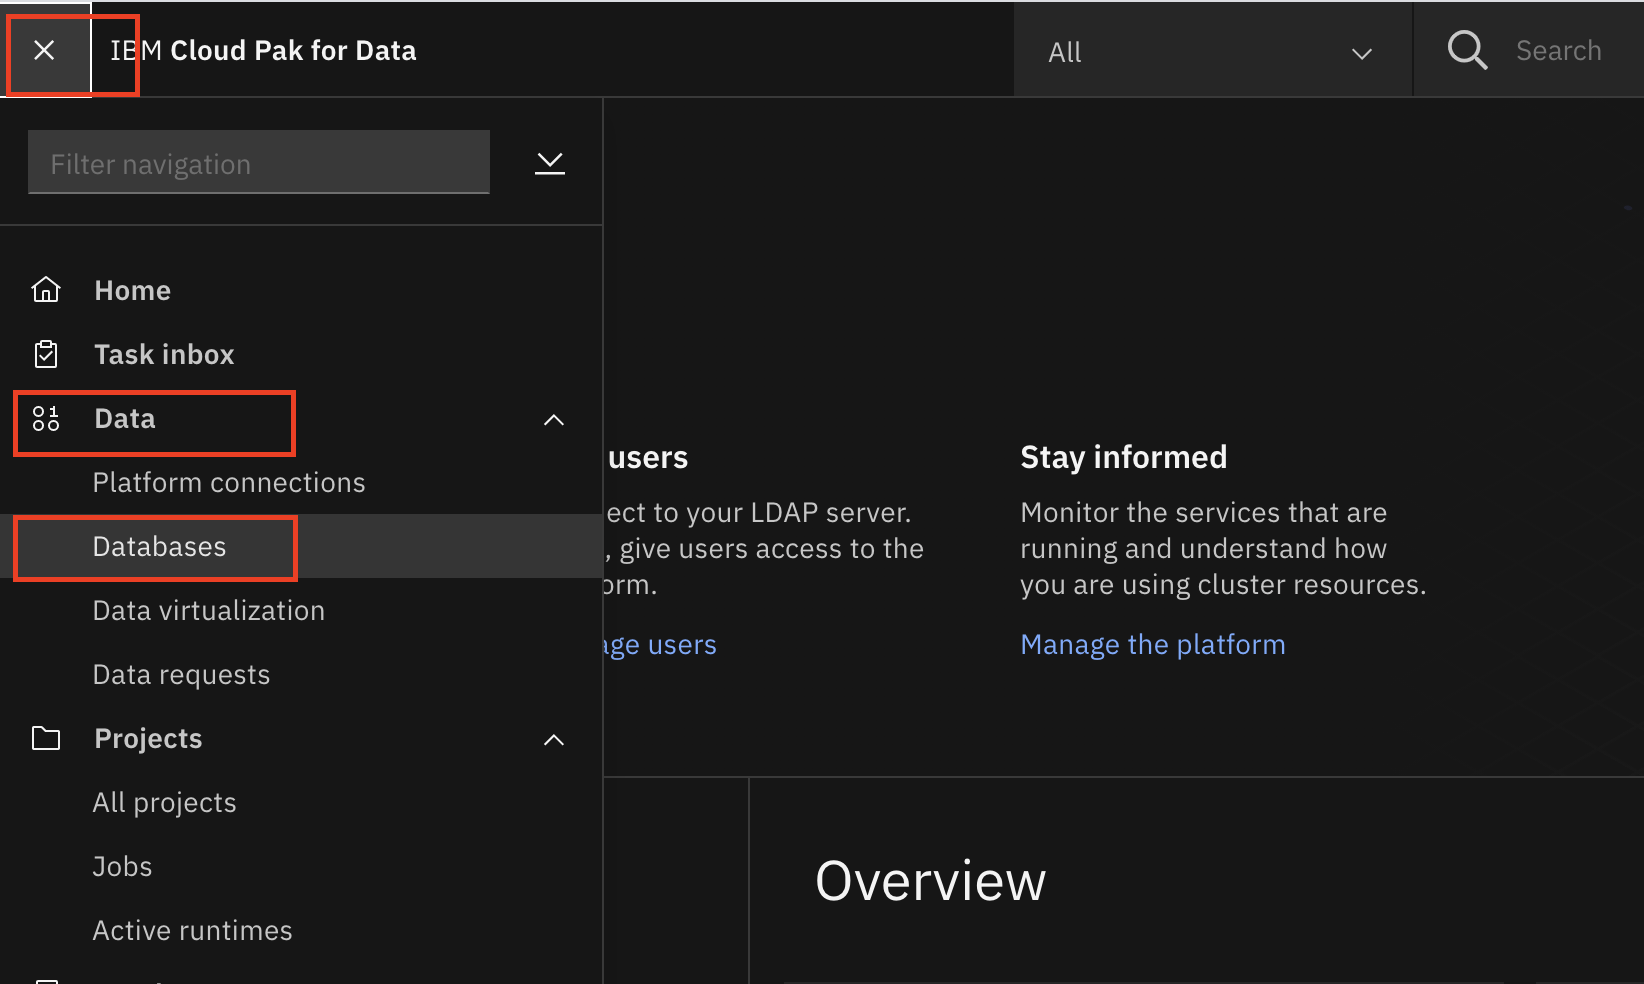

### 2. Click on the verticle dots and navigate to 'Open Database'. This will take you to the Db2 UI 

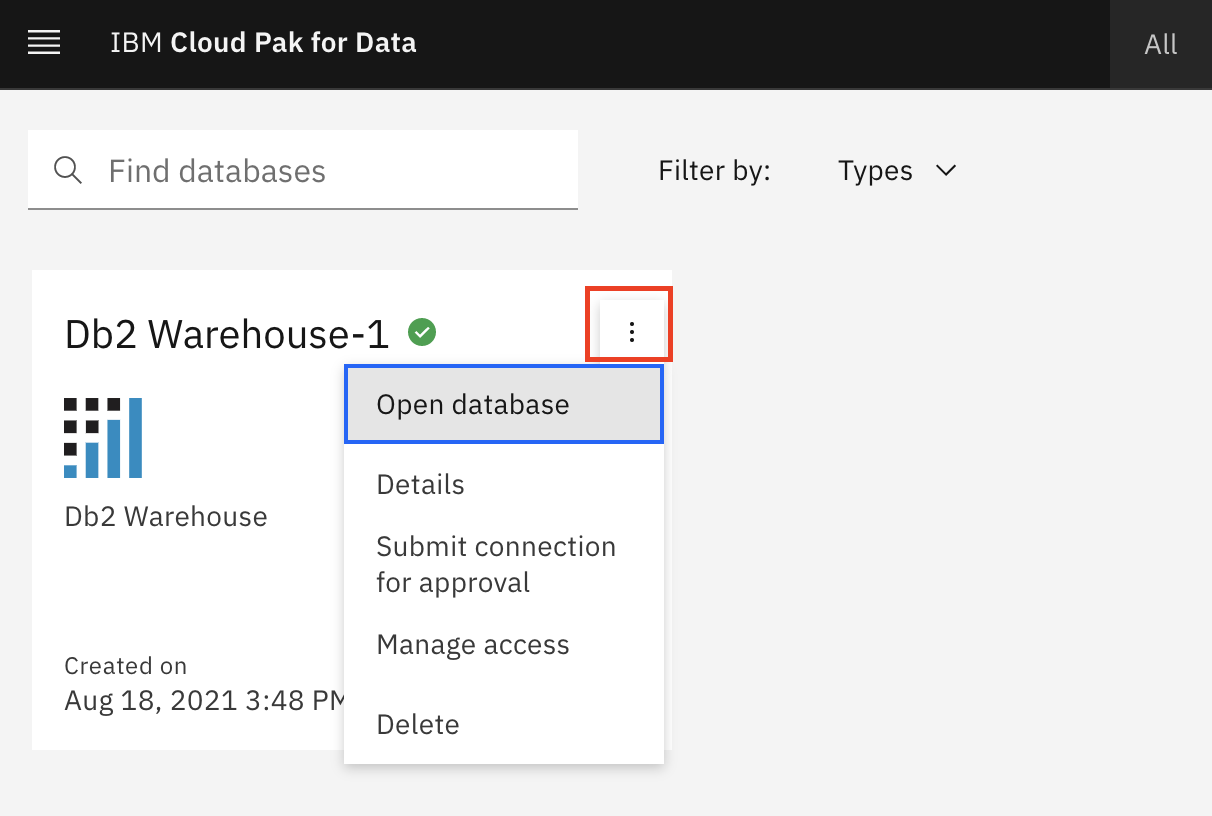

### 3. Navigate to  'Tables' > 'Load' > 'Load Data' to load the Flight Information dataset

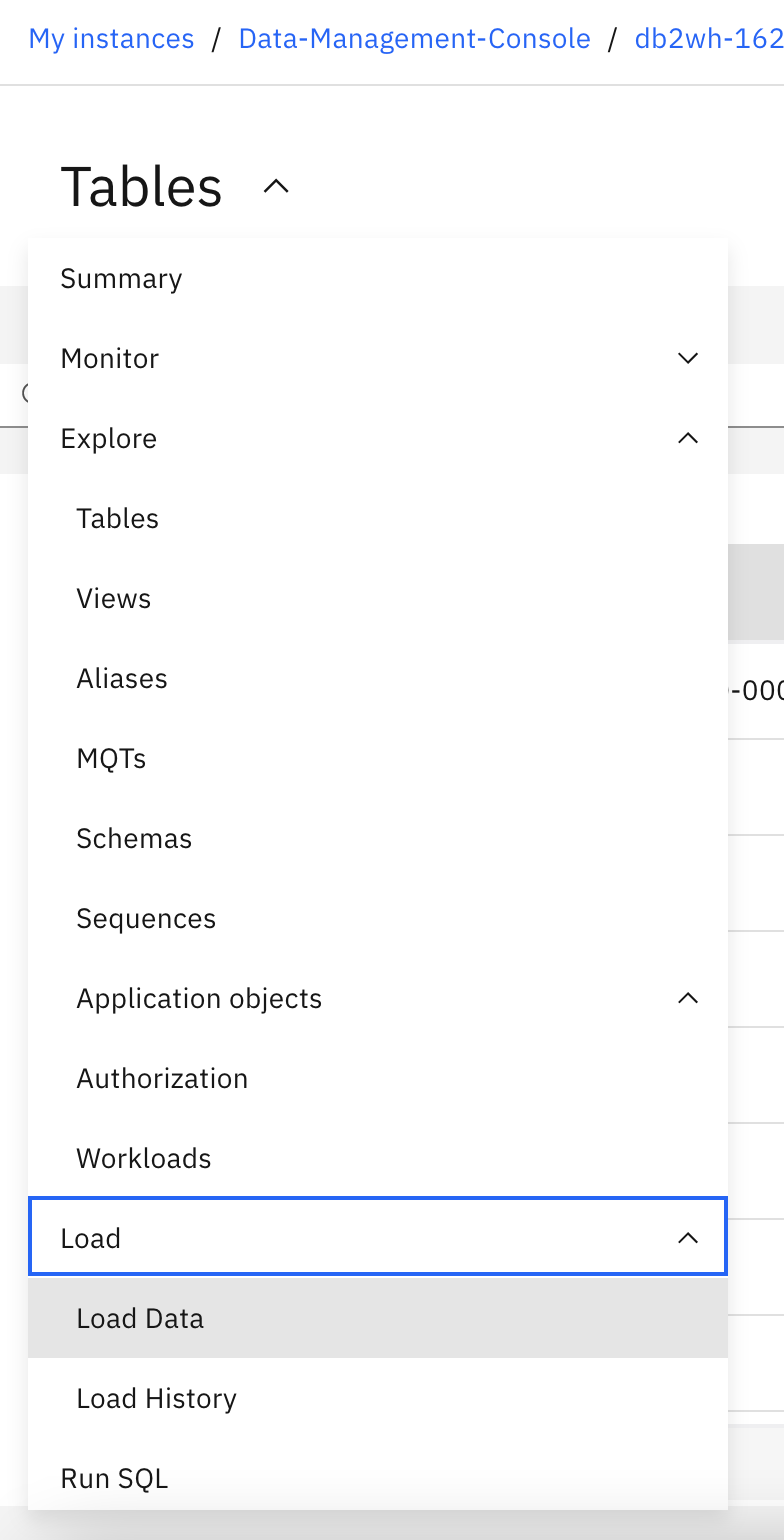

### 4. You can drag and drop the csv file or click on the '+' icon and find the directory location

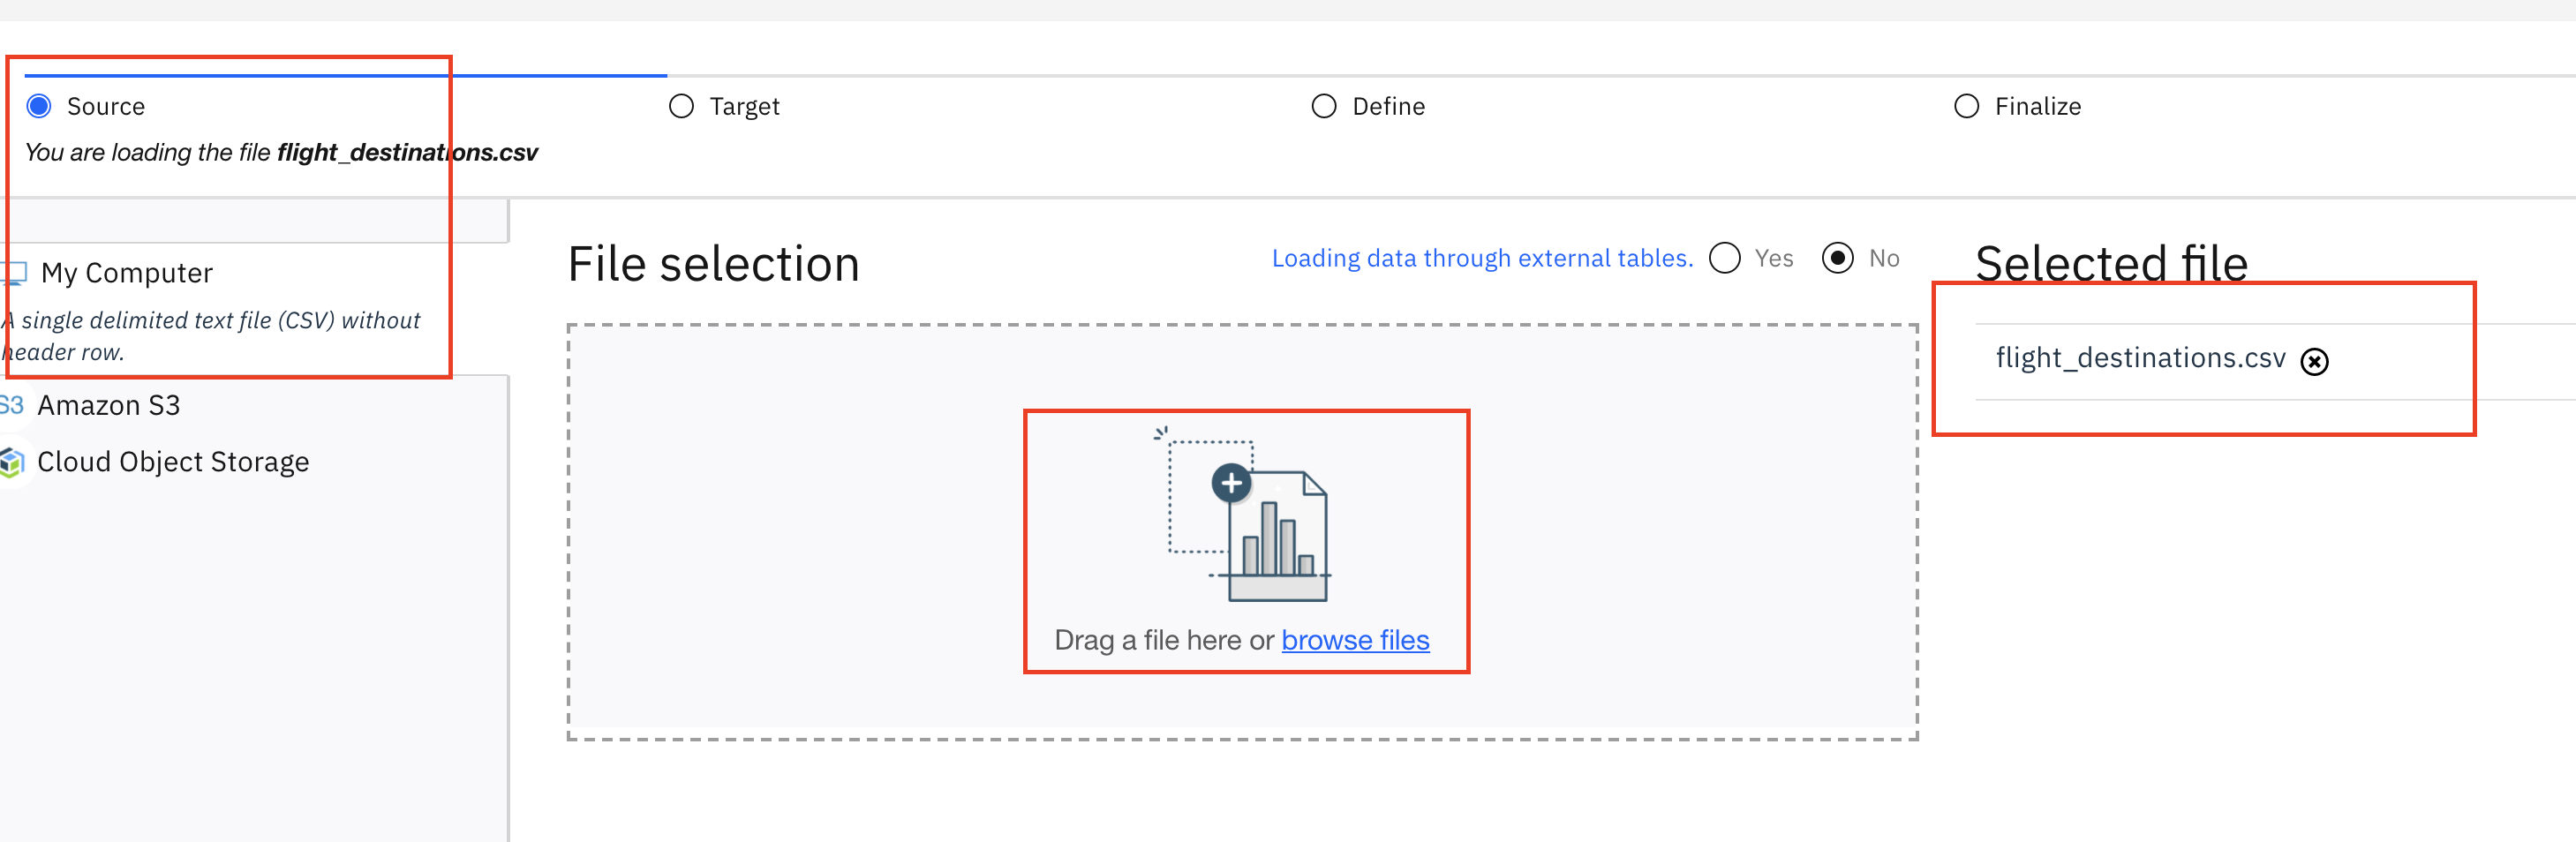

### 5. Once you upload the file, you will move on to the 'Target' screen. Click on 'New Schema +' and name the schema 'FLIGHTS'

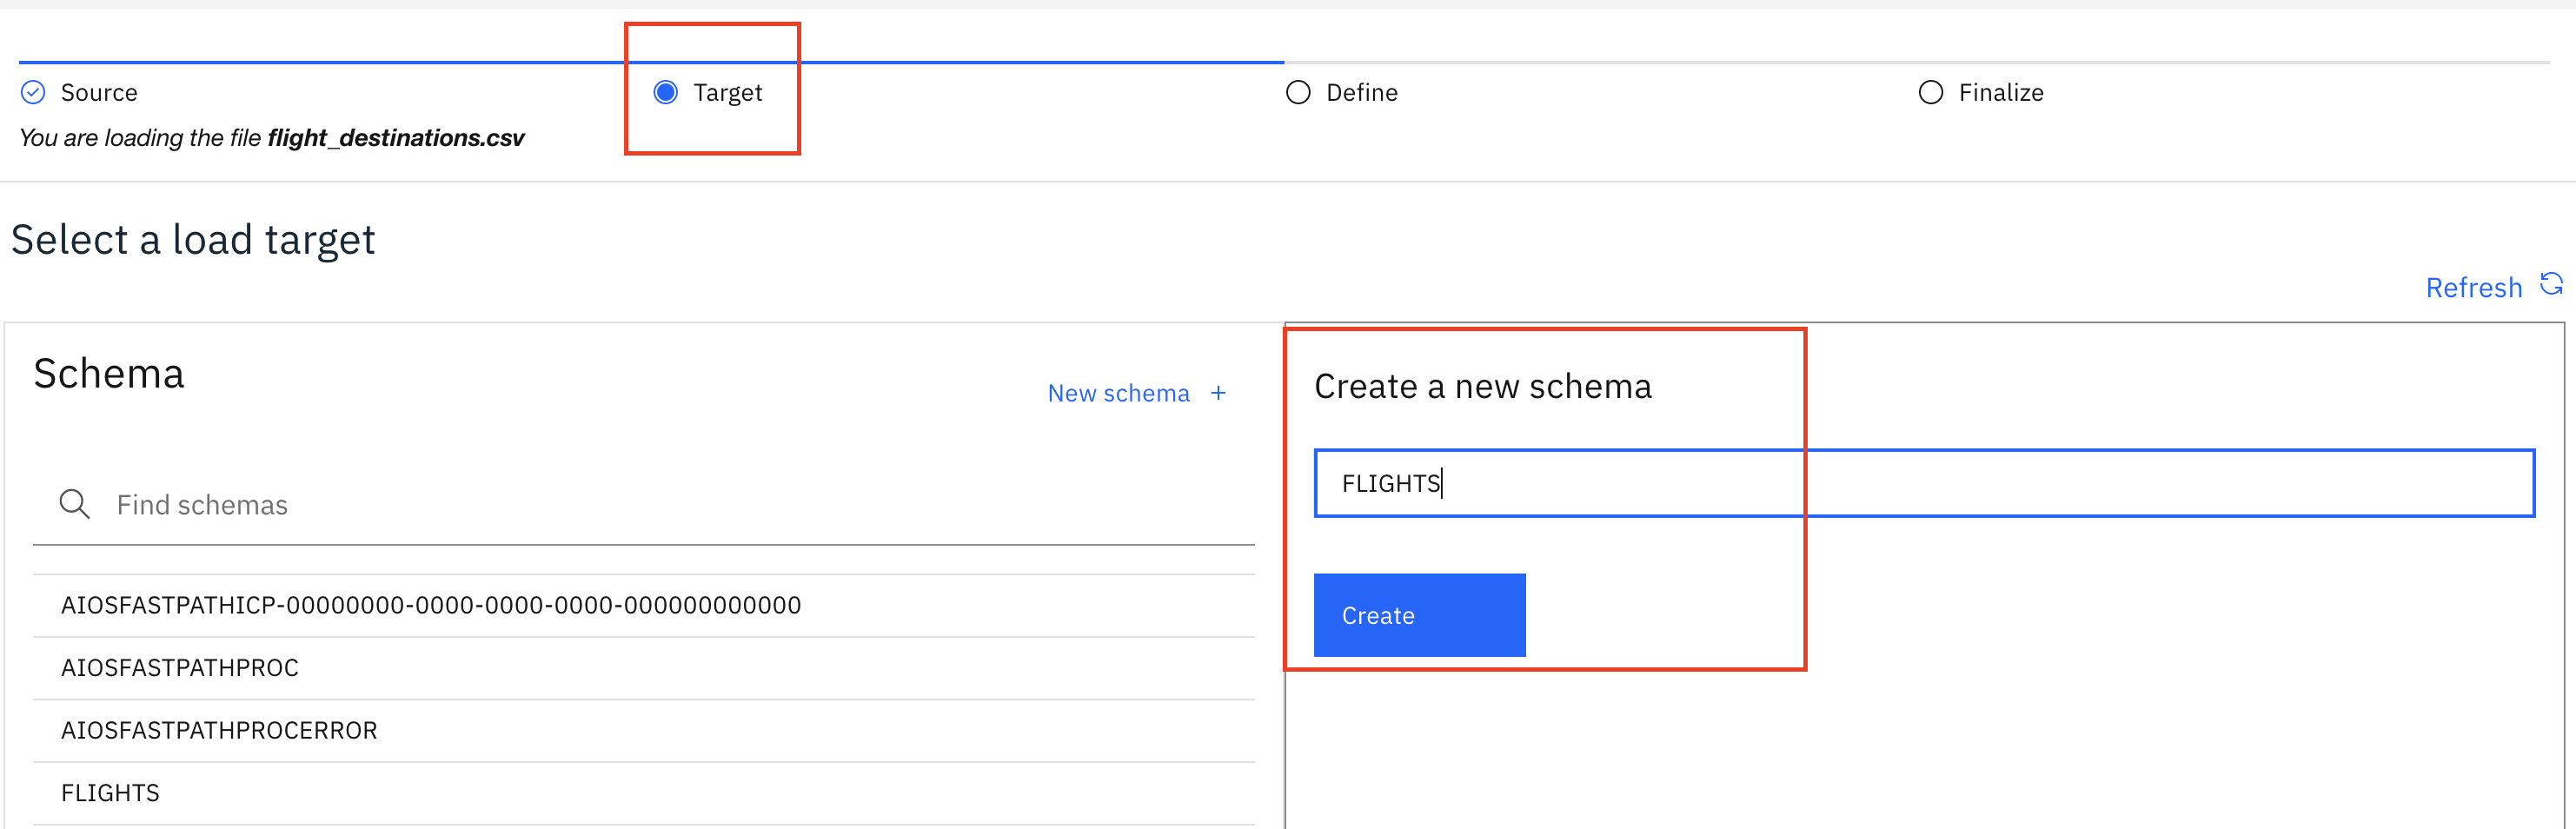

### 6.  Click on 'New Table +' and name the table 'FLIGHT_INFORMATION'

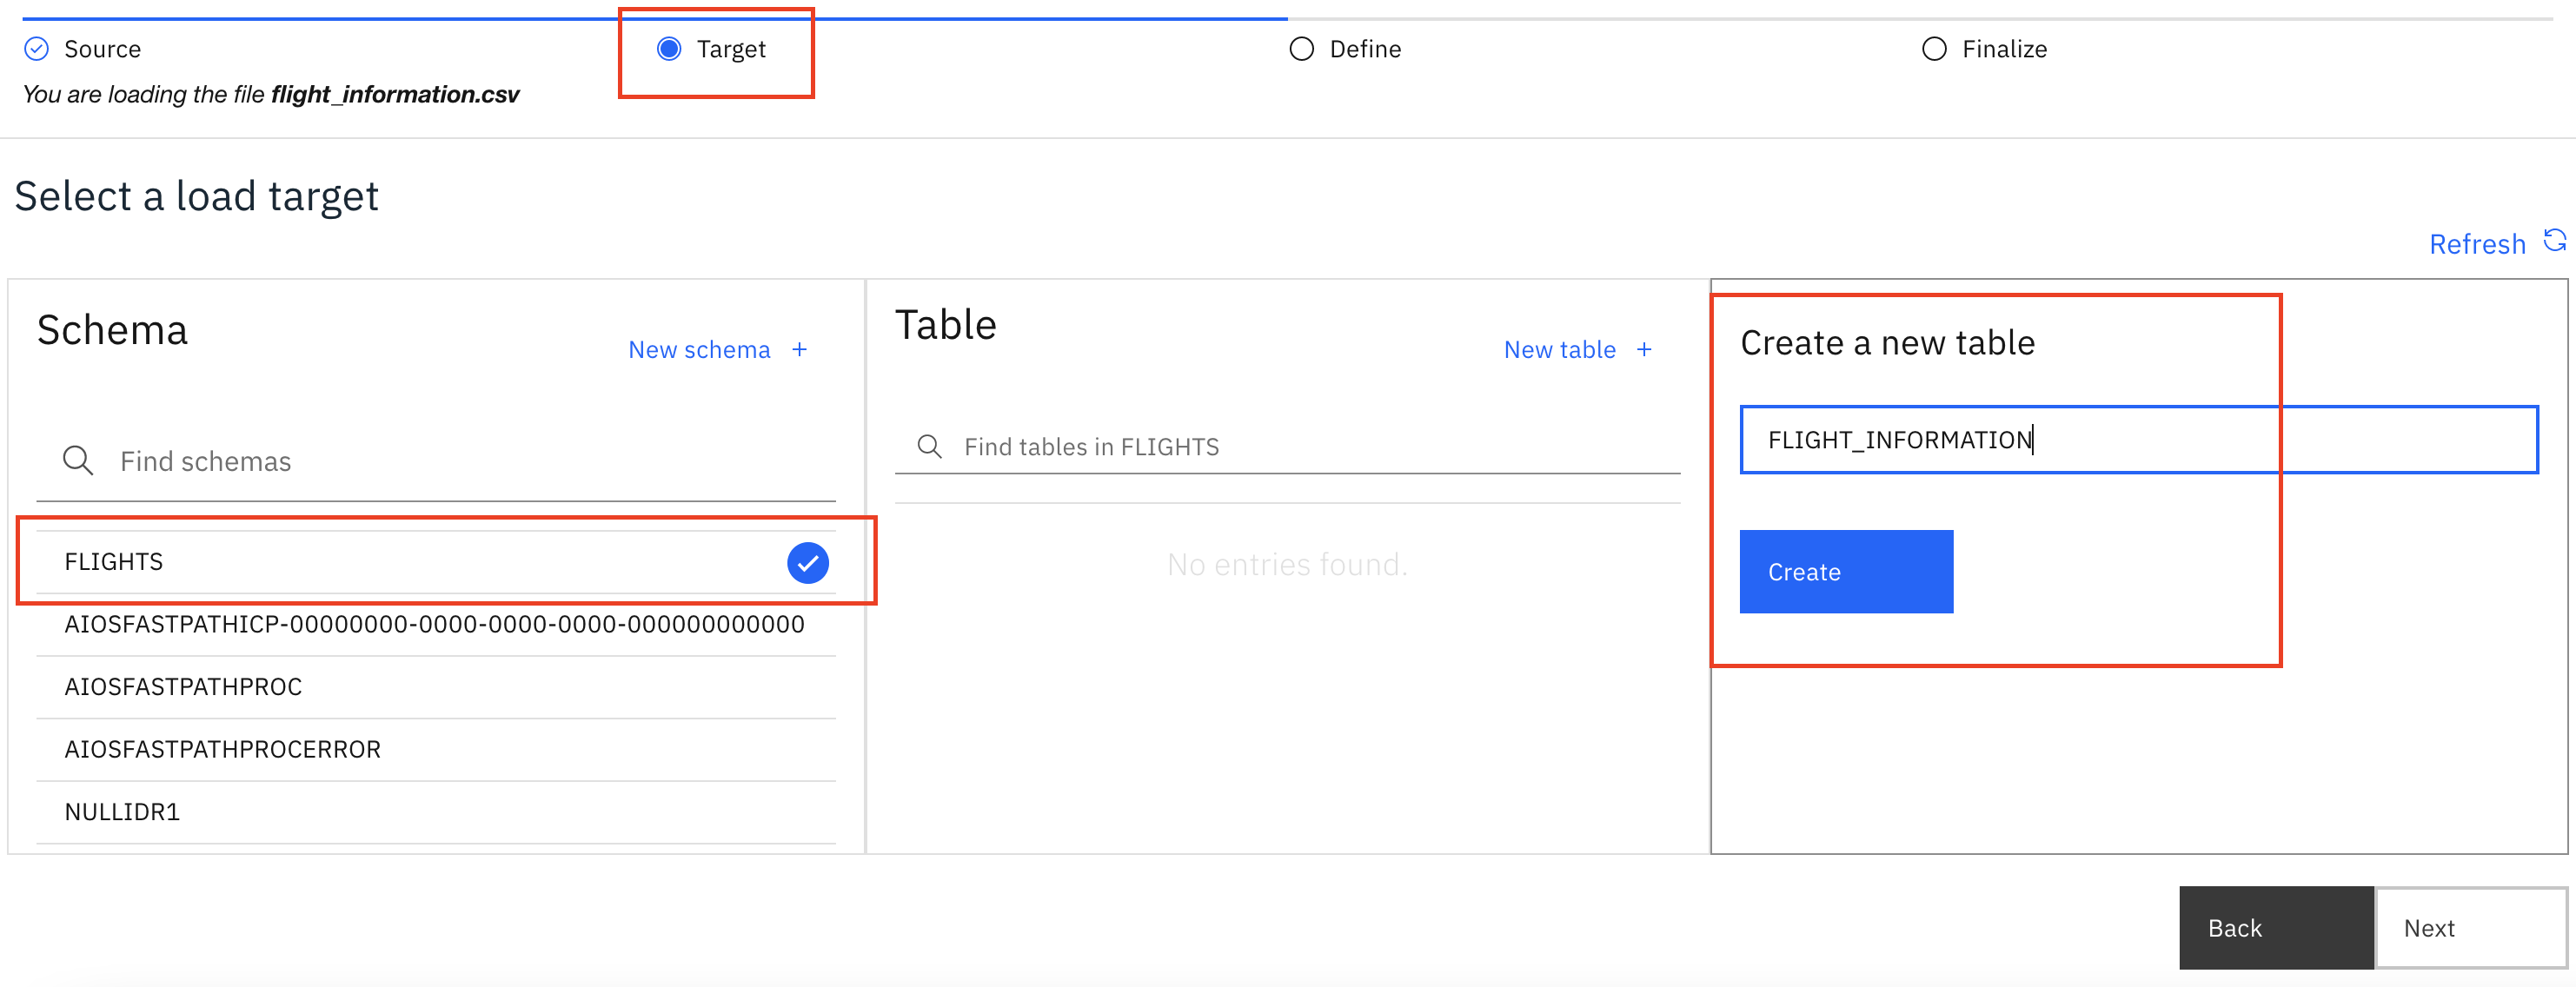

### 7. Click on 'Next' and you will be taken to the 'Define' screen. 

    7a. The headers should show up. In the event that they don't, toggle the 'Header in first row' bar. Once you toggle (switch off and back on), the column headers should appear. 

    7b. Click on the pencil item to the right of 'VARCHAR(9)' under the FLIGHT_ID field. We will set this variable as 'Integer'. Repeat this for all columns. 
    
   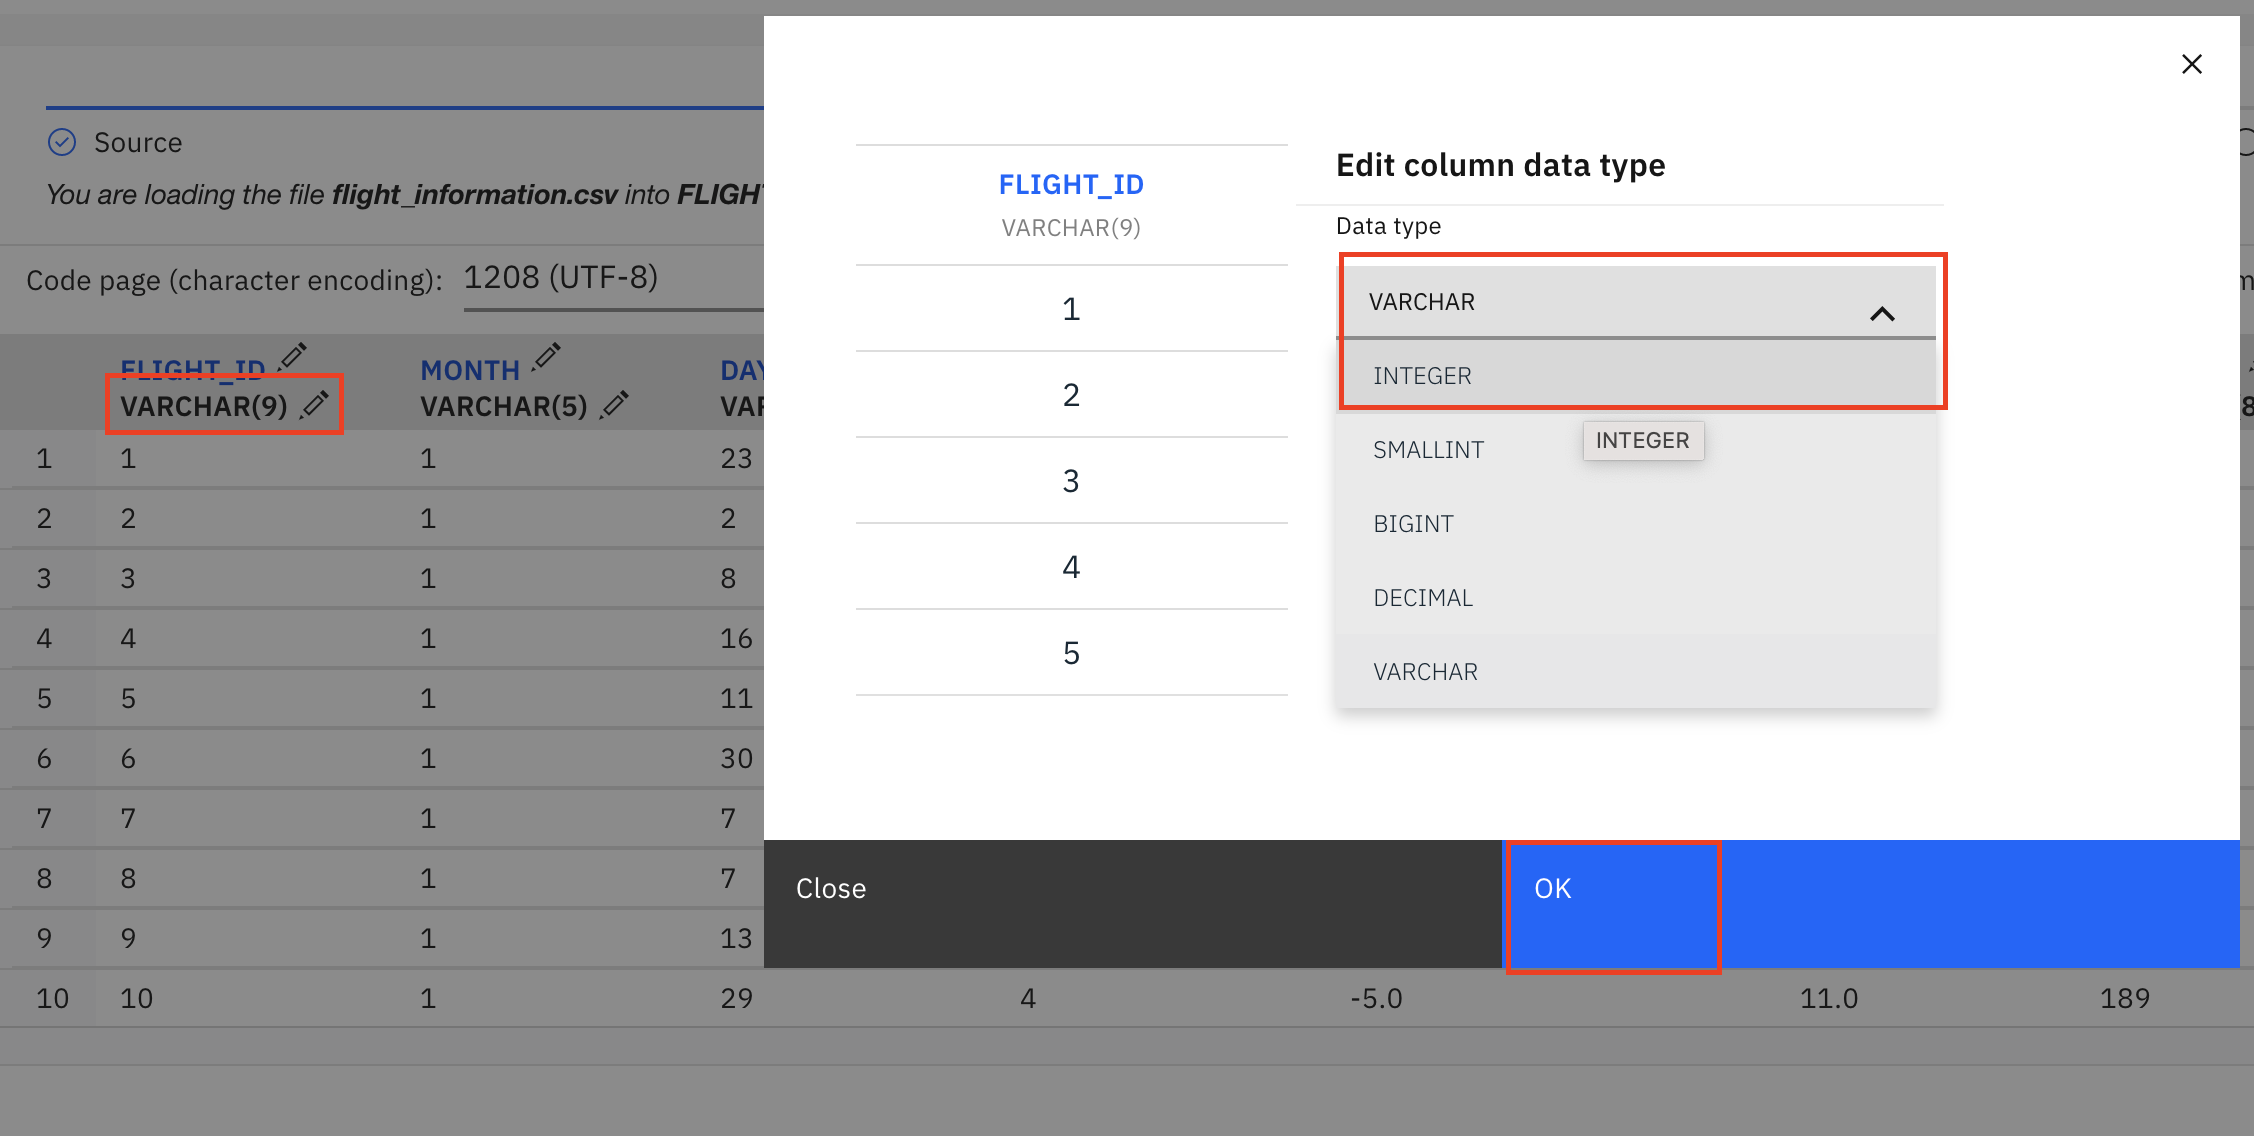
   
   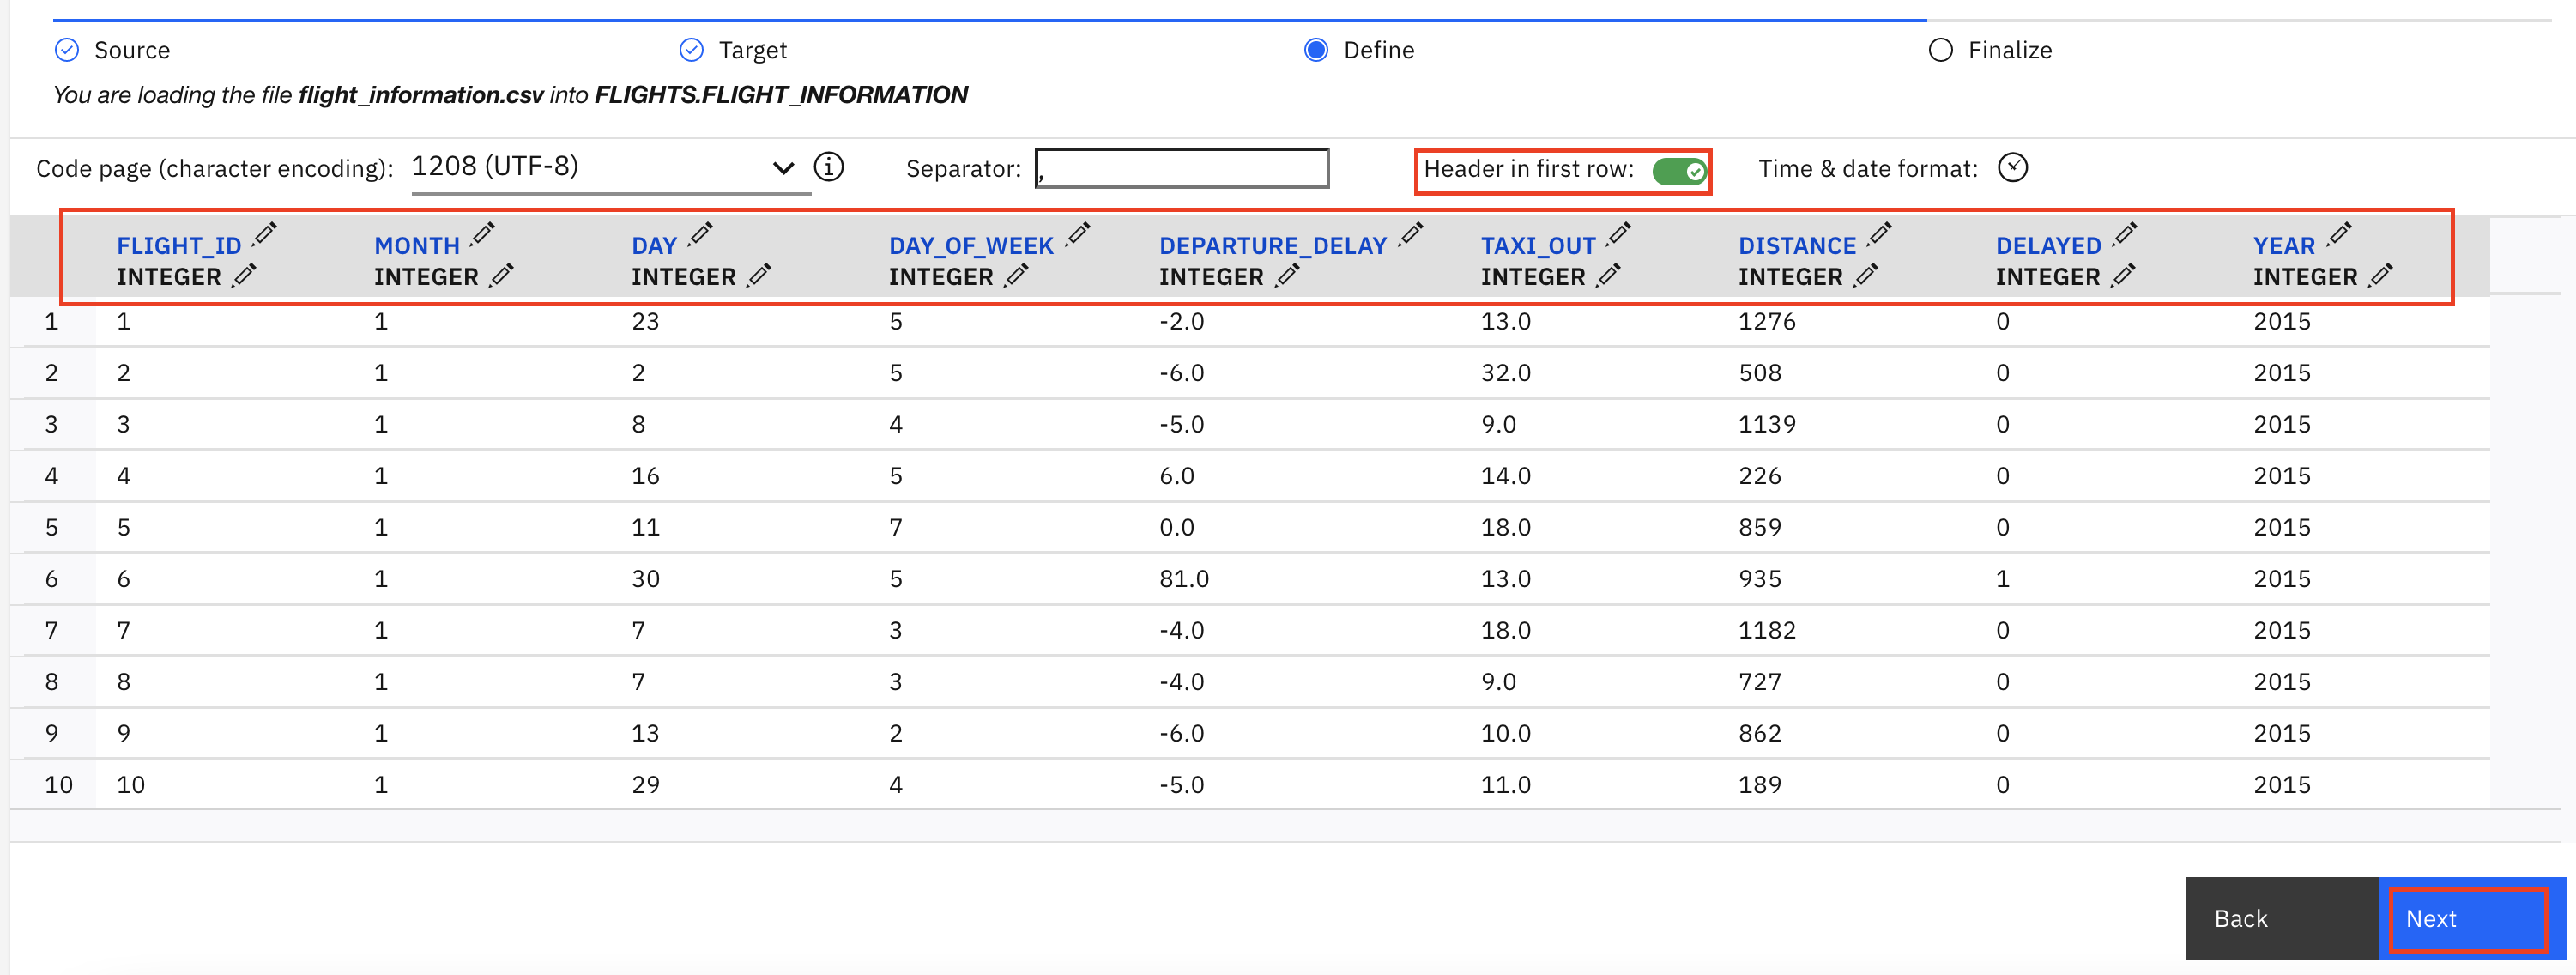

### 8. Click 'Next' and then 'Begin Load'. You will have completed this step once you get the 'The data load job succeeded.' message. 

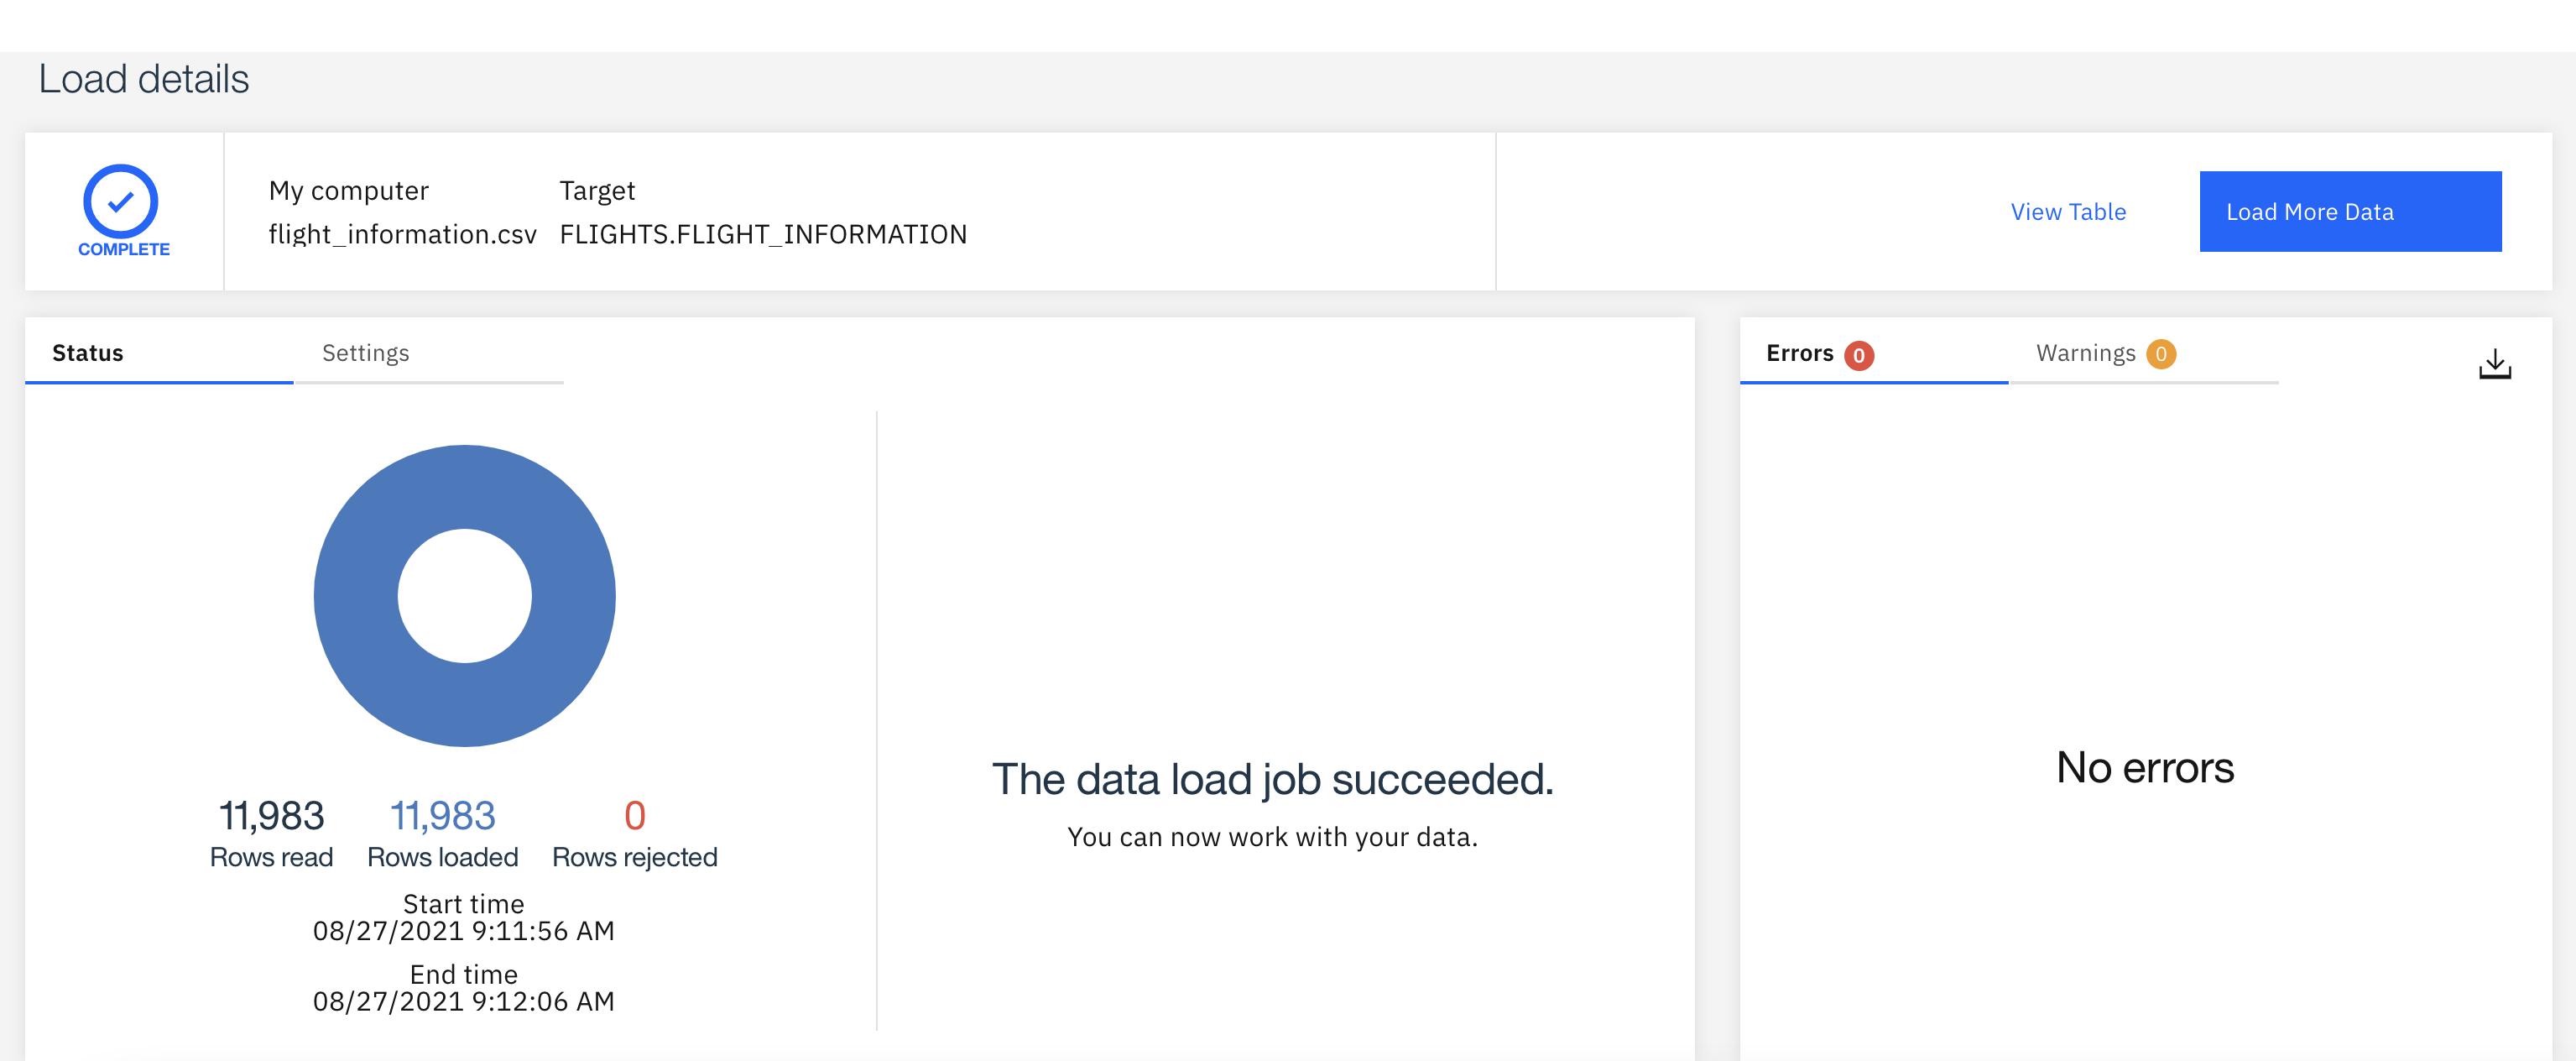

## Add a Connection for Db2 on CP4D 

### 1. Starting on the Cloud Pak for Data home page, navigate to the Sandwhich icon at the top left corner, then go to 'Data' > 'Databases'. This should take you to a view of your enabled databases.

### 2. Click on the verticle dots and navigate to 'Details'. From this page you will need to record:
    1. Database Name: BLUDB
    2. Hostname: <hostname>
    3. Port: <port>
    4. User: <user>
    5. Password: <should be provided by database/cluster admin>
    
    Values not recorded for privacy. 
    
   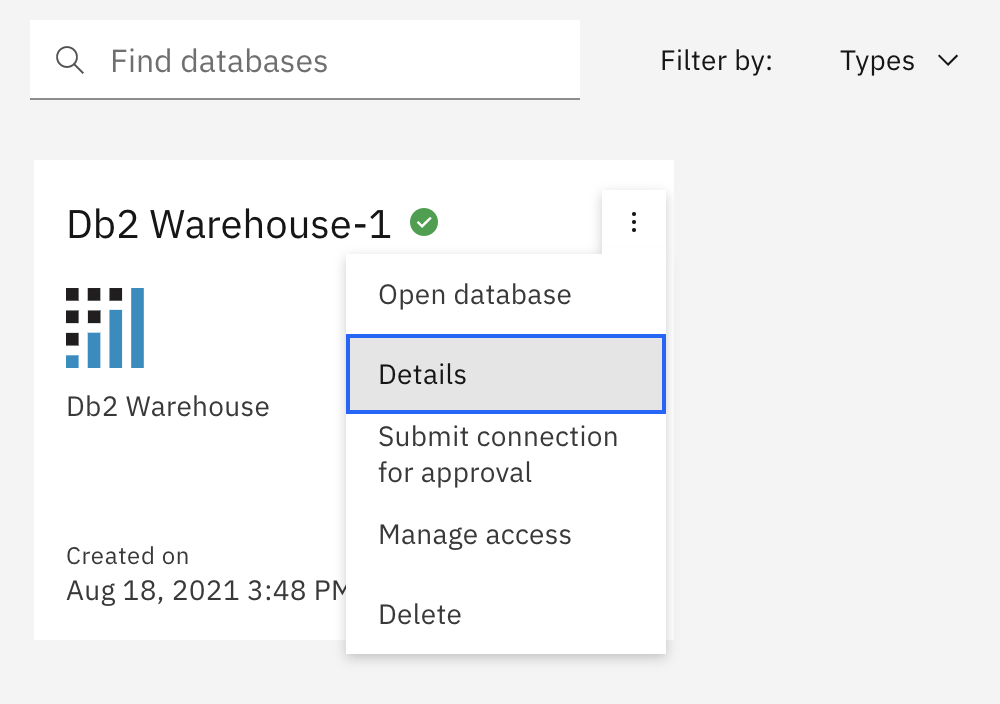
   
   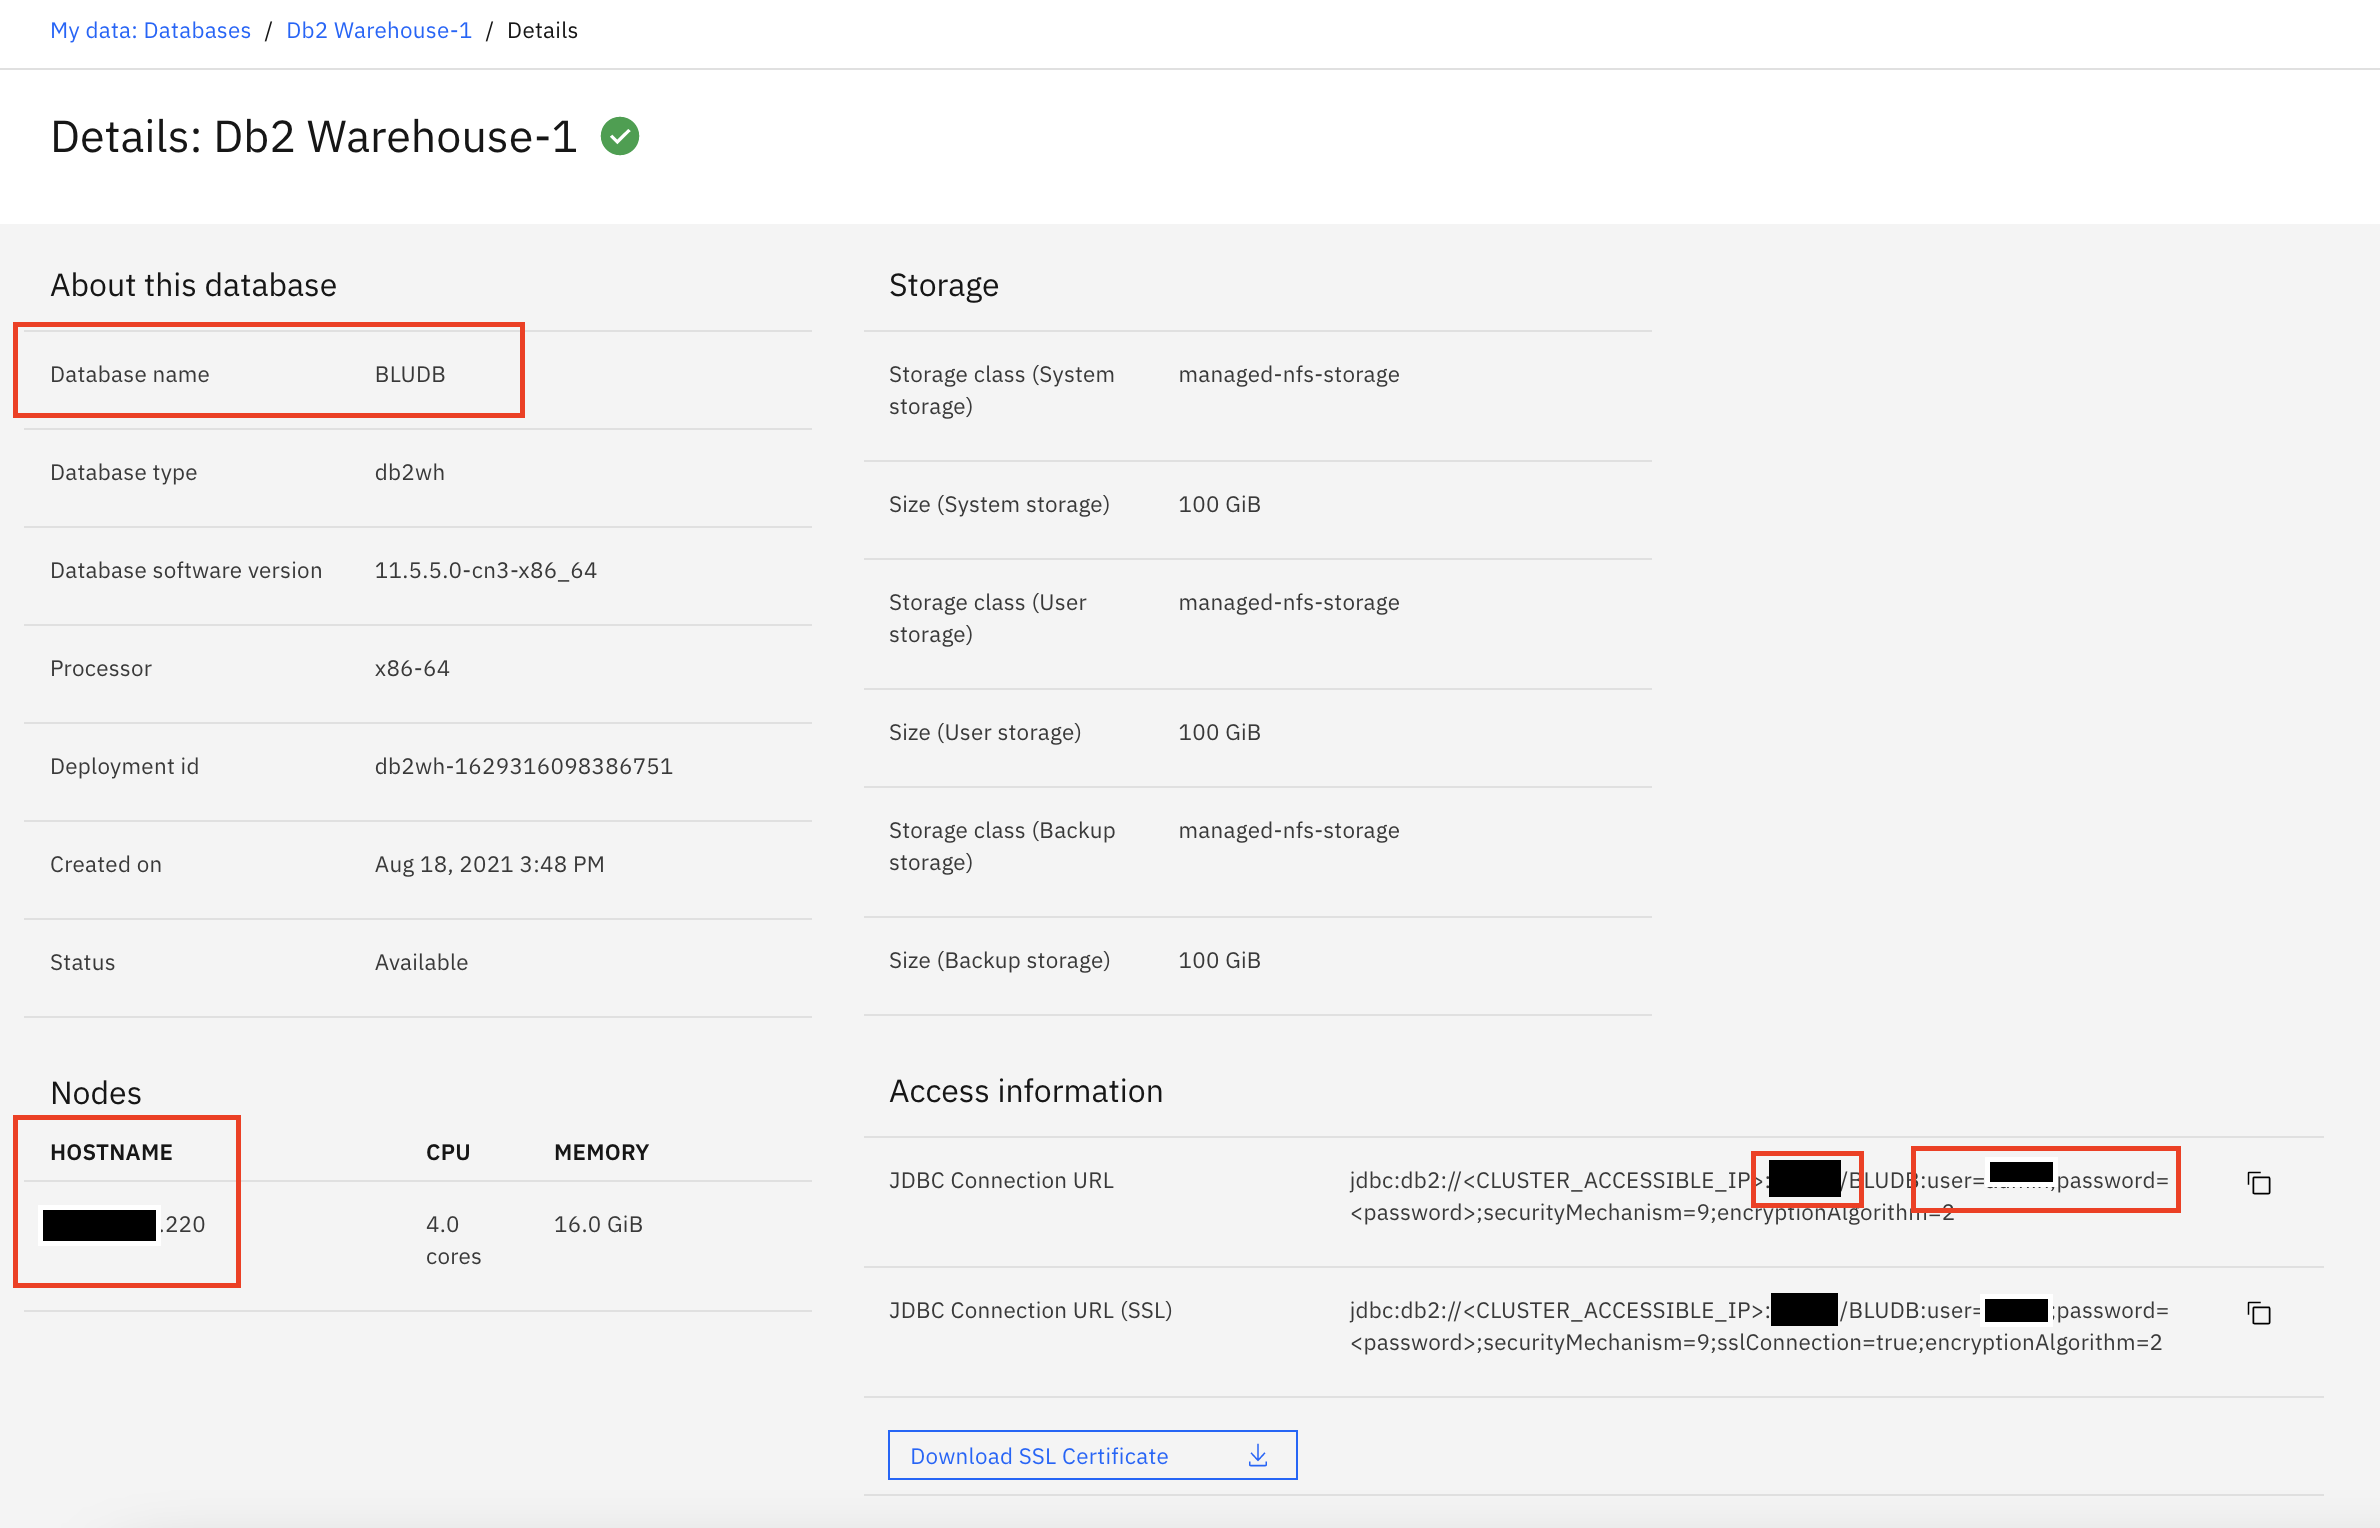
   
### 3. Click on the Sandwhich icon at the top left and naviagte 'Platform Connections'. This will take you to the create connections UI. 

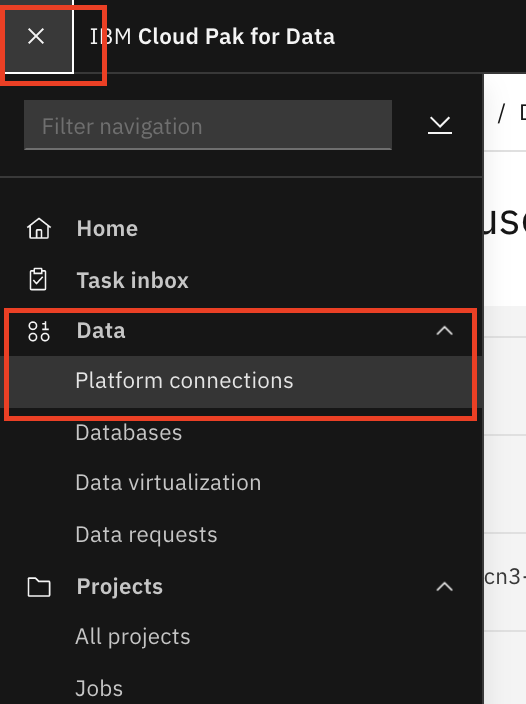

### 4. Click on 'New Connection +'. This will take you to the databases page and select 'Db2'. 

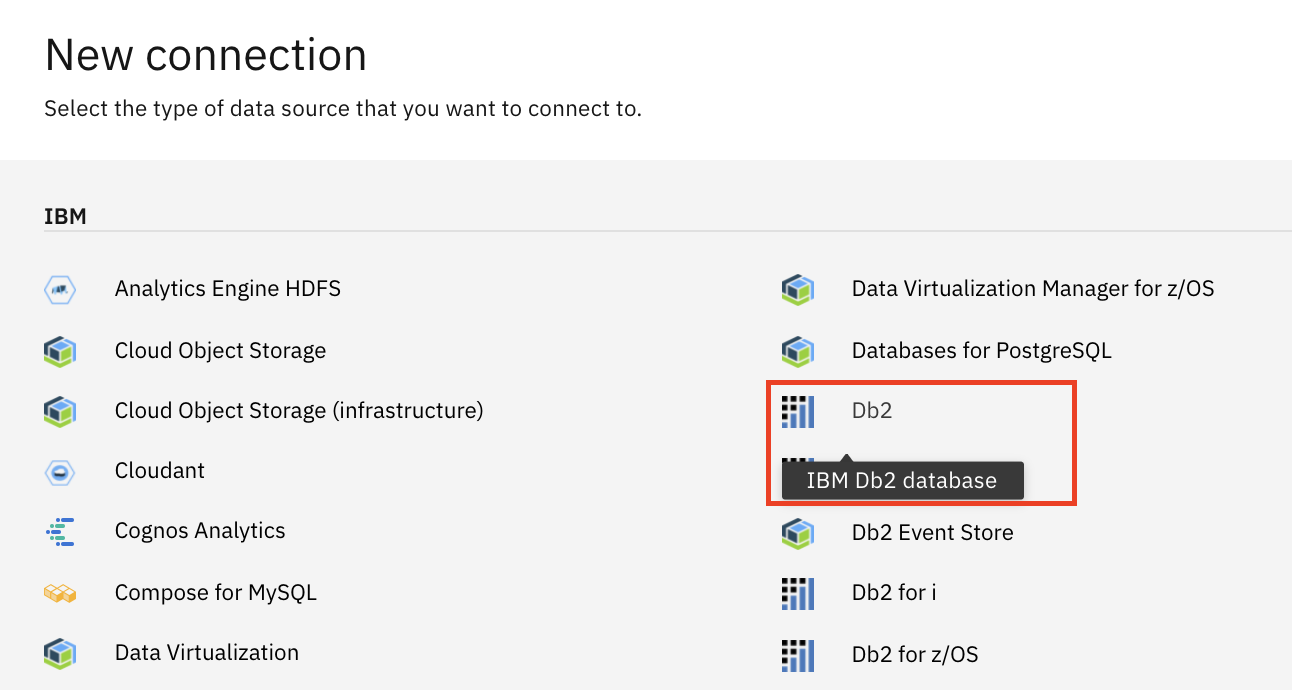

### 5. In the 'New Db2 connection' field prompts, fill in the following information: 

    1. Name: FlightInfoCP4D
    2. Database: BLUDB
    3. Hostname: collected in step 2
    4. Port: collected in step 2
    5. User: collected in step 2
    6. Password: collected in step 2
   
    5a. Make sure 'Port is SSL-enabled (optional)' is checked OFF
    
   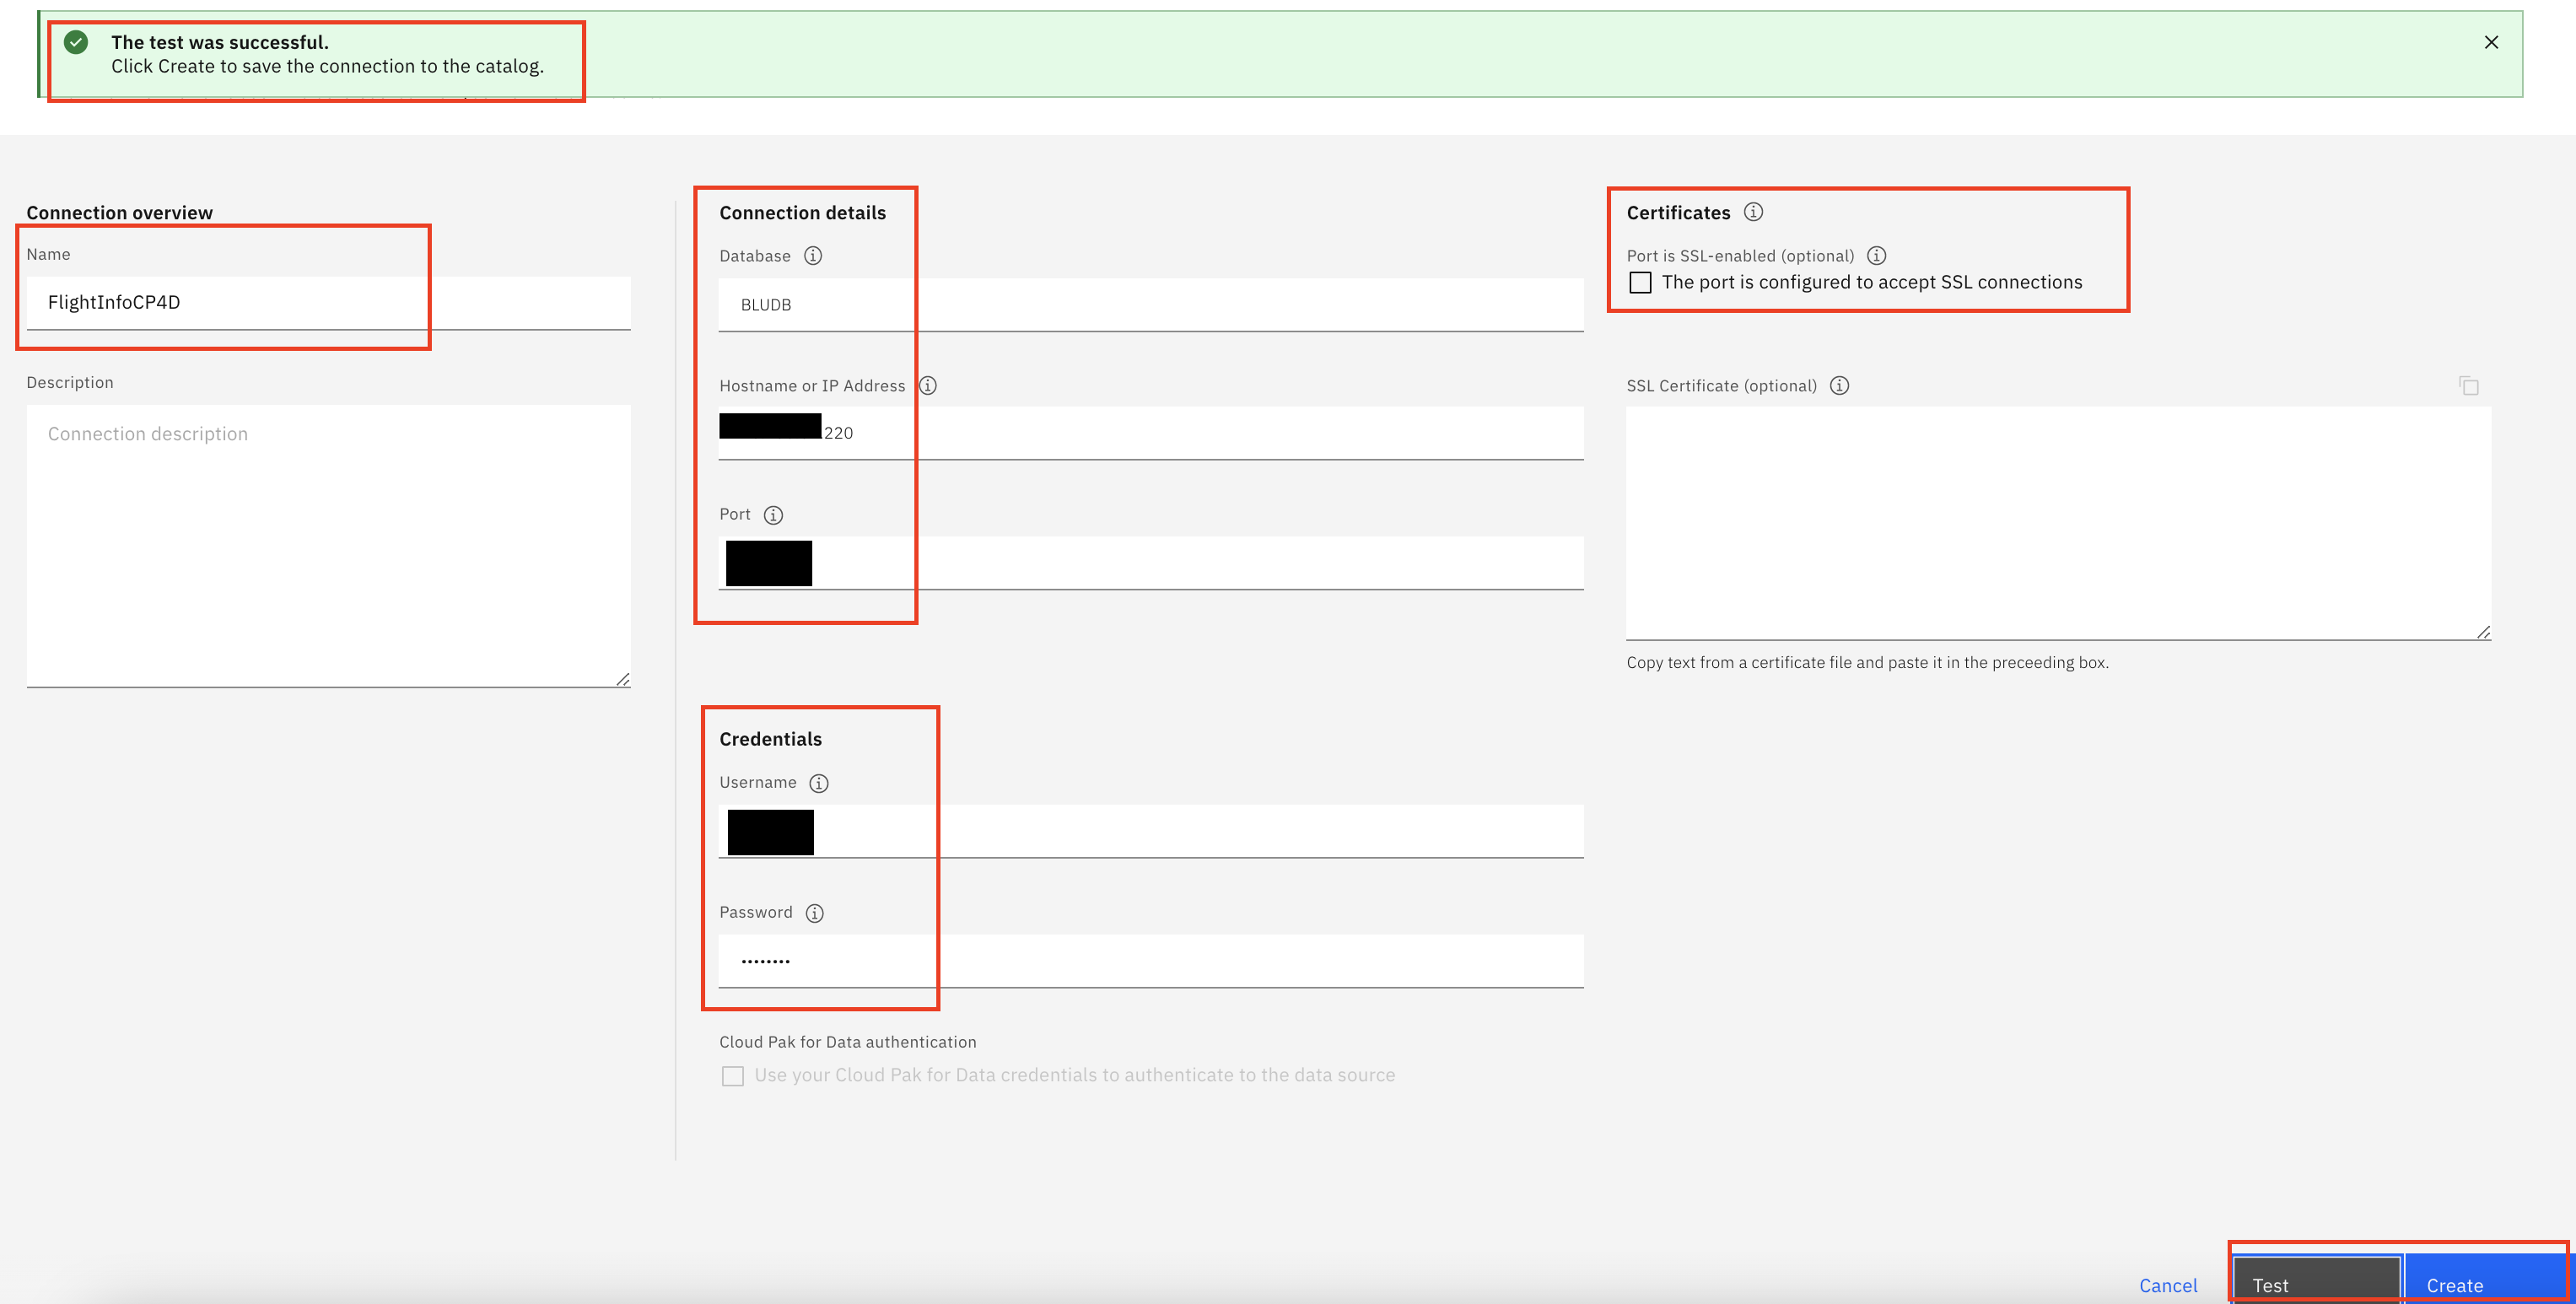


### 6. Click 'Test' to test the connection and then click 'Create'. You will have completed this step once you see the connection in the 'Platform Connections' page.

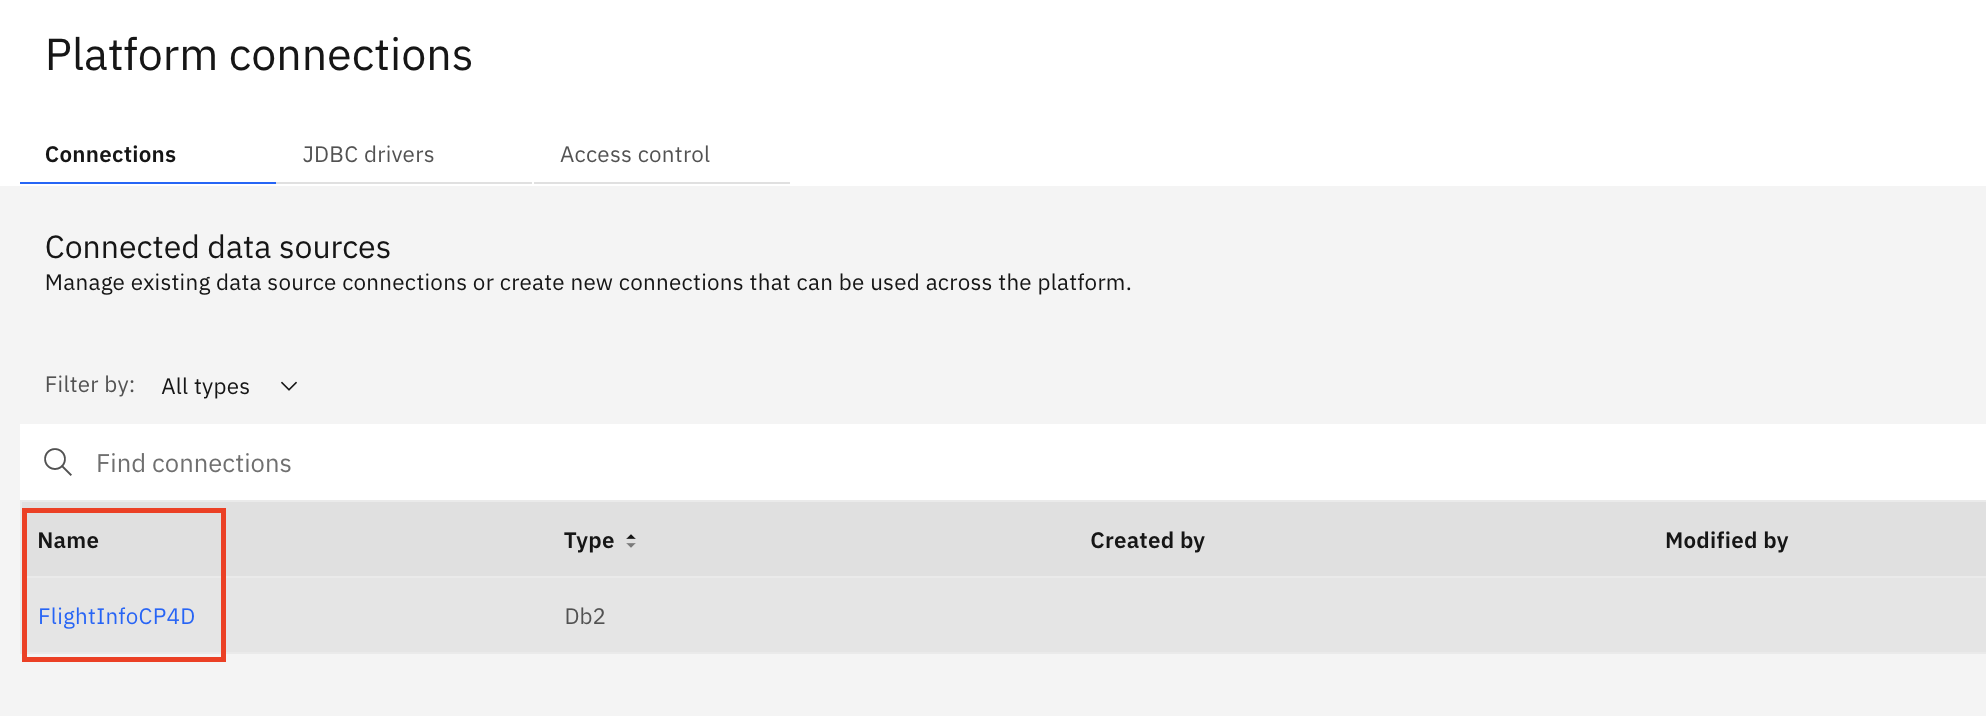

## Creating a Db2 Database on IBM Cloud

### 1. Go to the [IBM Cloud](https://cloud.ibm.com/login) website and 'Log in'.
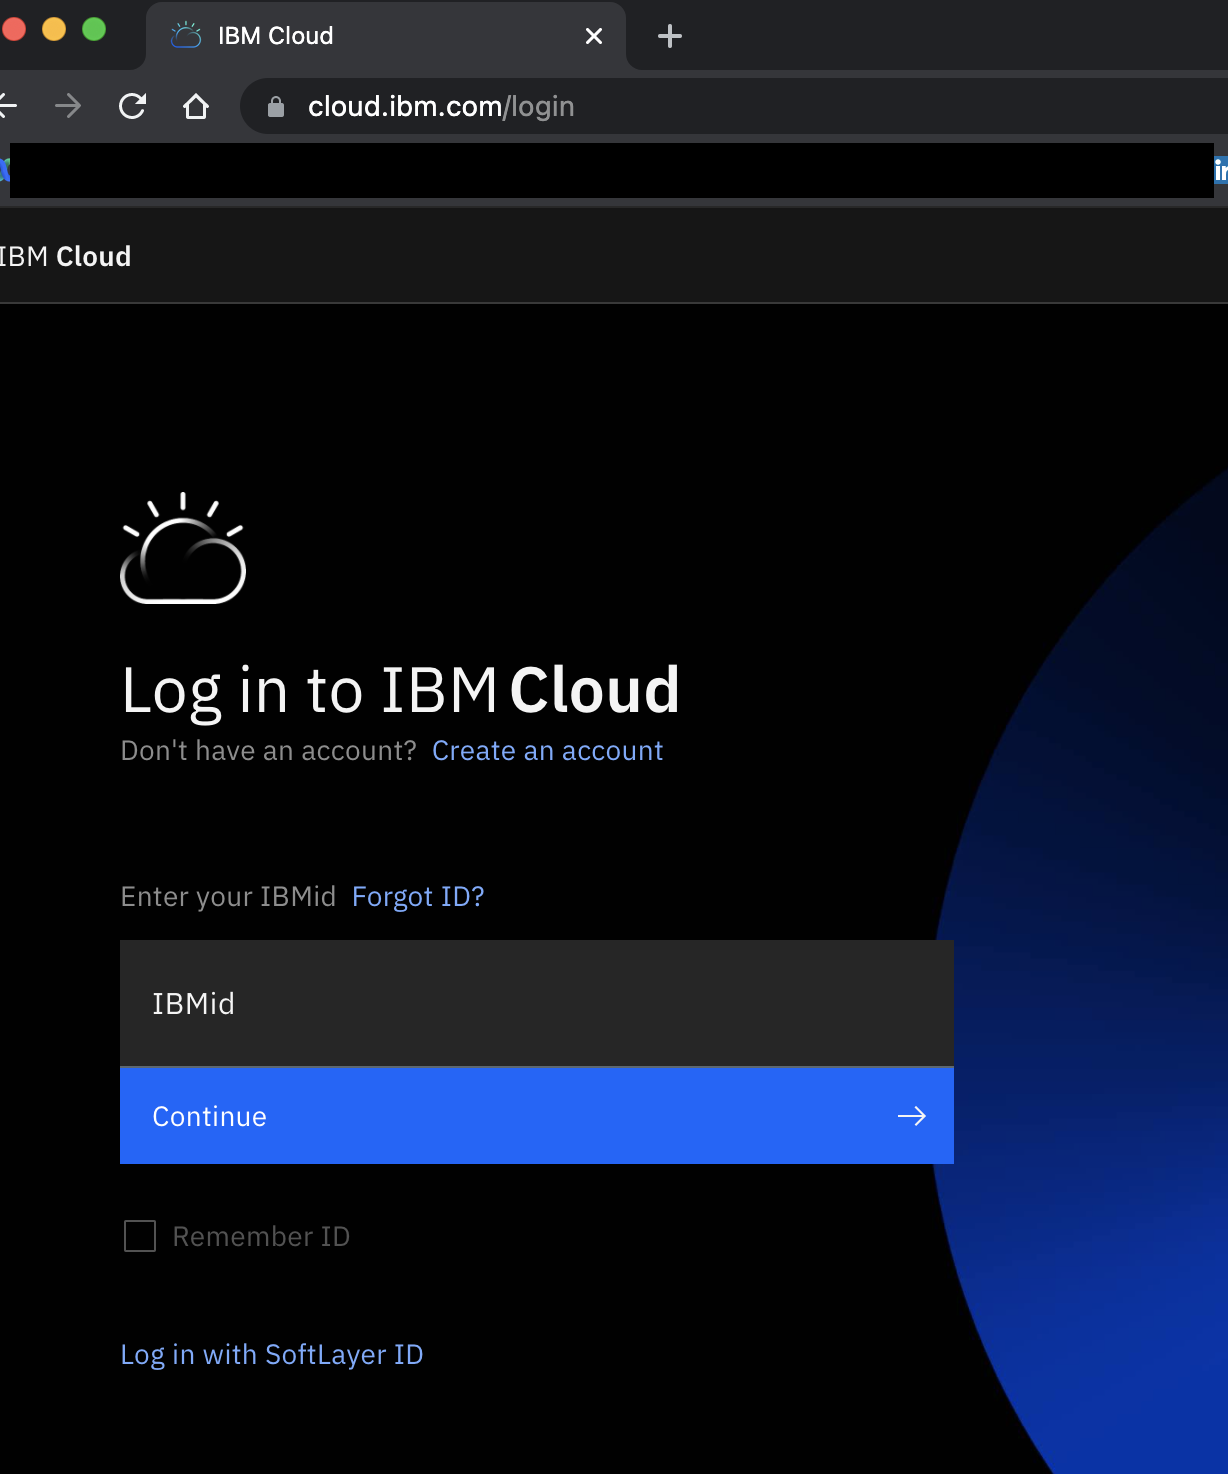

### 2. If you don't have a Db2 service provisioned, you will need to create one. 
    2a. Type in 'Db2' on the searchbar and click on 'Db2' 
    2b. Laeve all the default settings and click create (the provision should take ~20 min). You will be redirected to your resource list.
   
   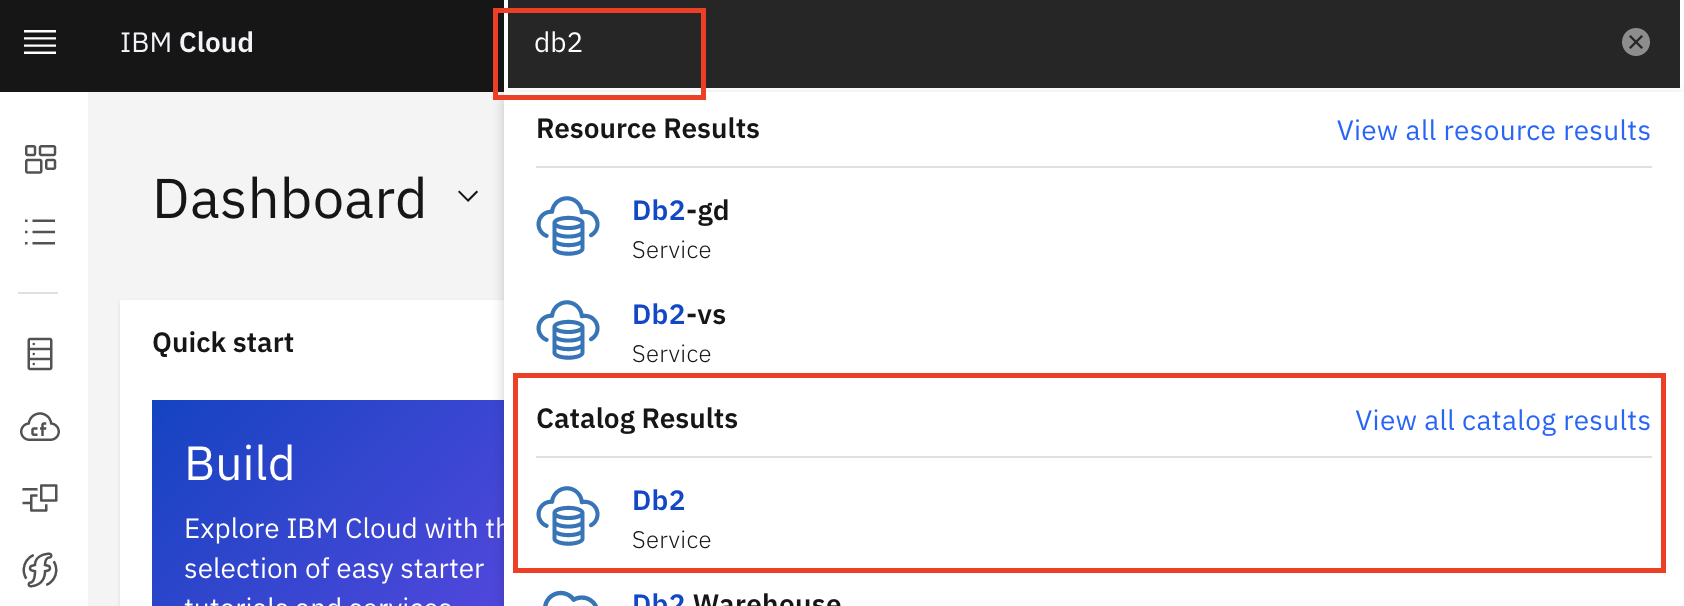
   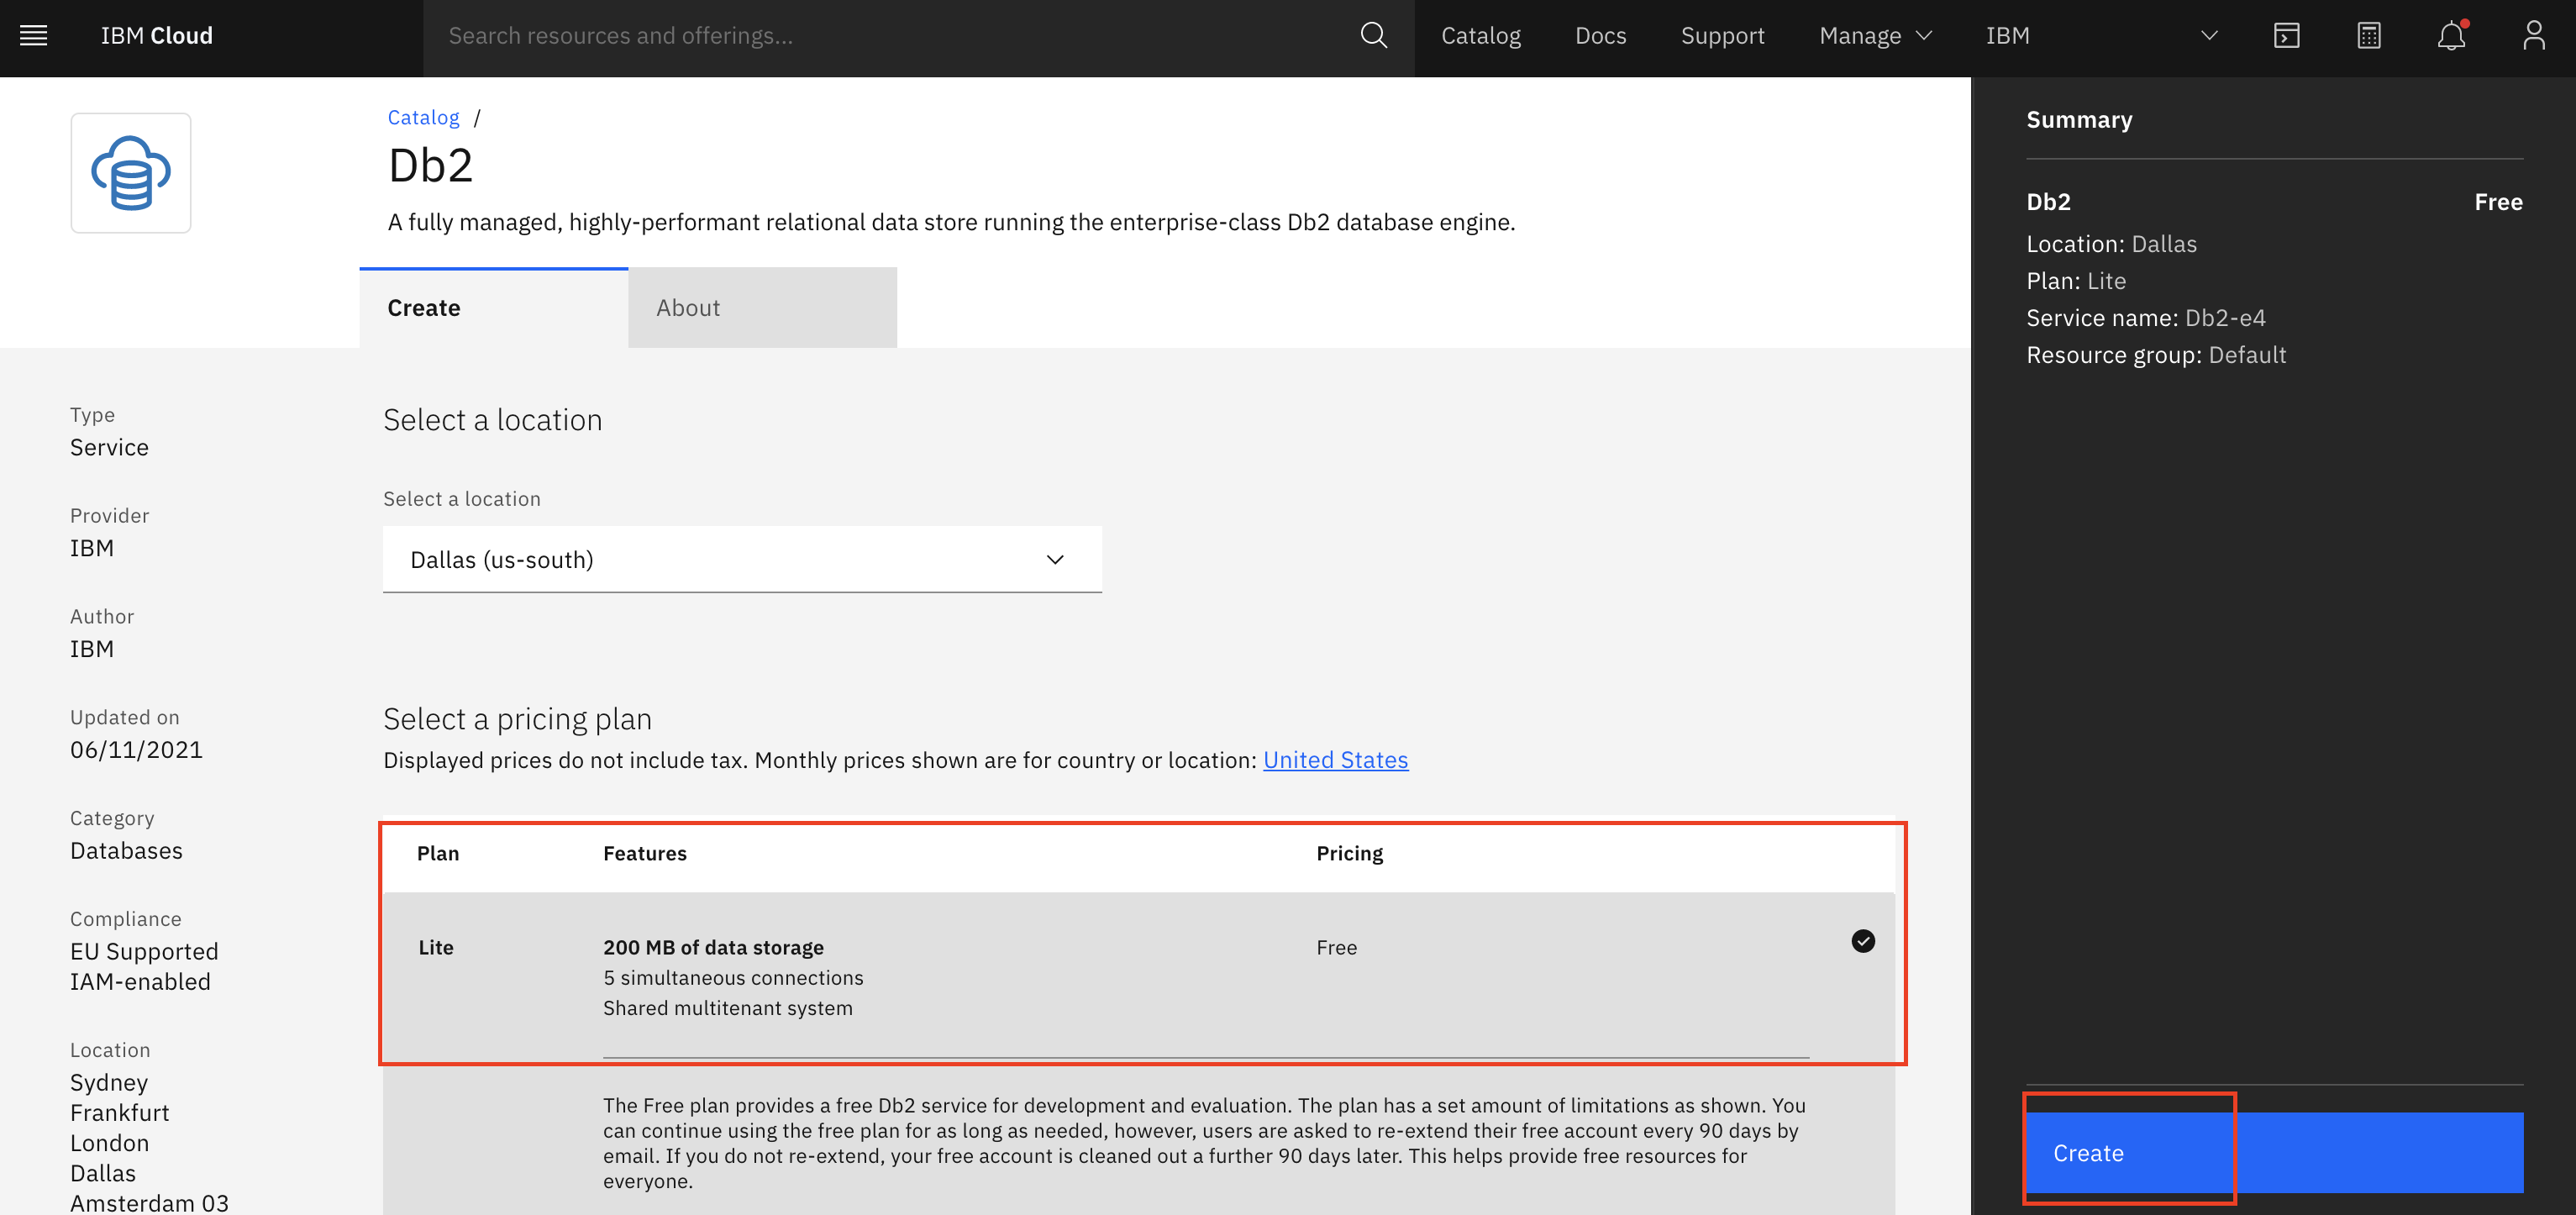

### 3. Once the Db2 service is provisioned, or if you already have a Db2 service, activate the service by clicking on it from the resource list. You can also search 'Db2' on the search bar and the provisioned instance should come up under services. 

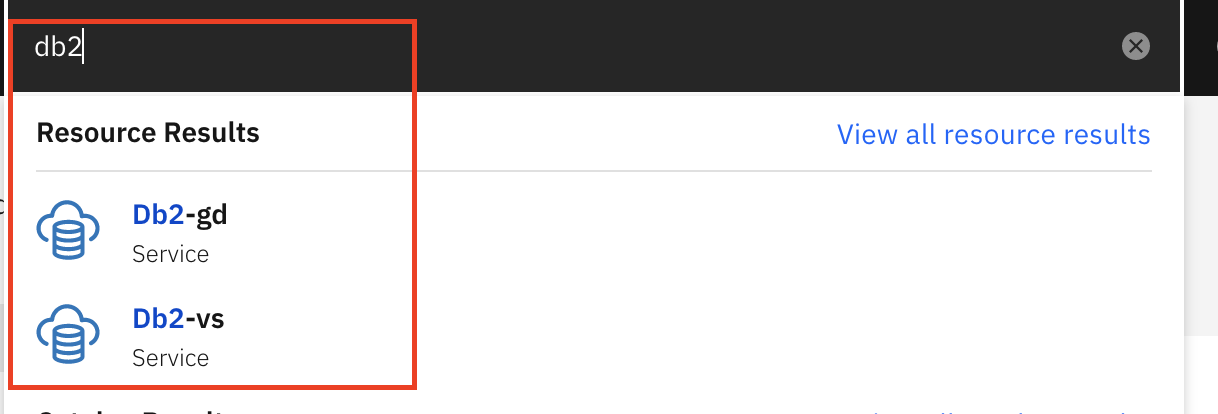

### 4. Navigate to 'Service Credentials' and the click on 'New Credential +'. Leave the default naming and settings and click 'Add'

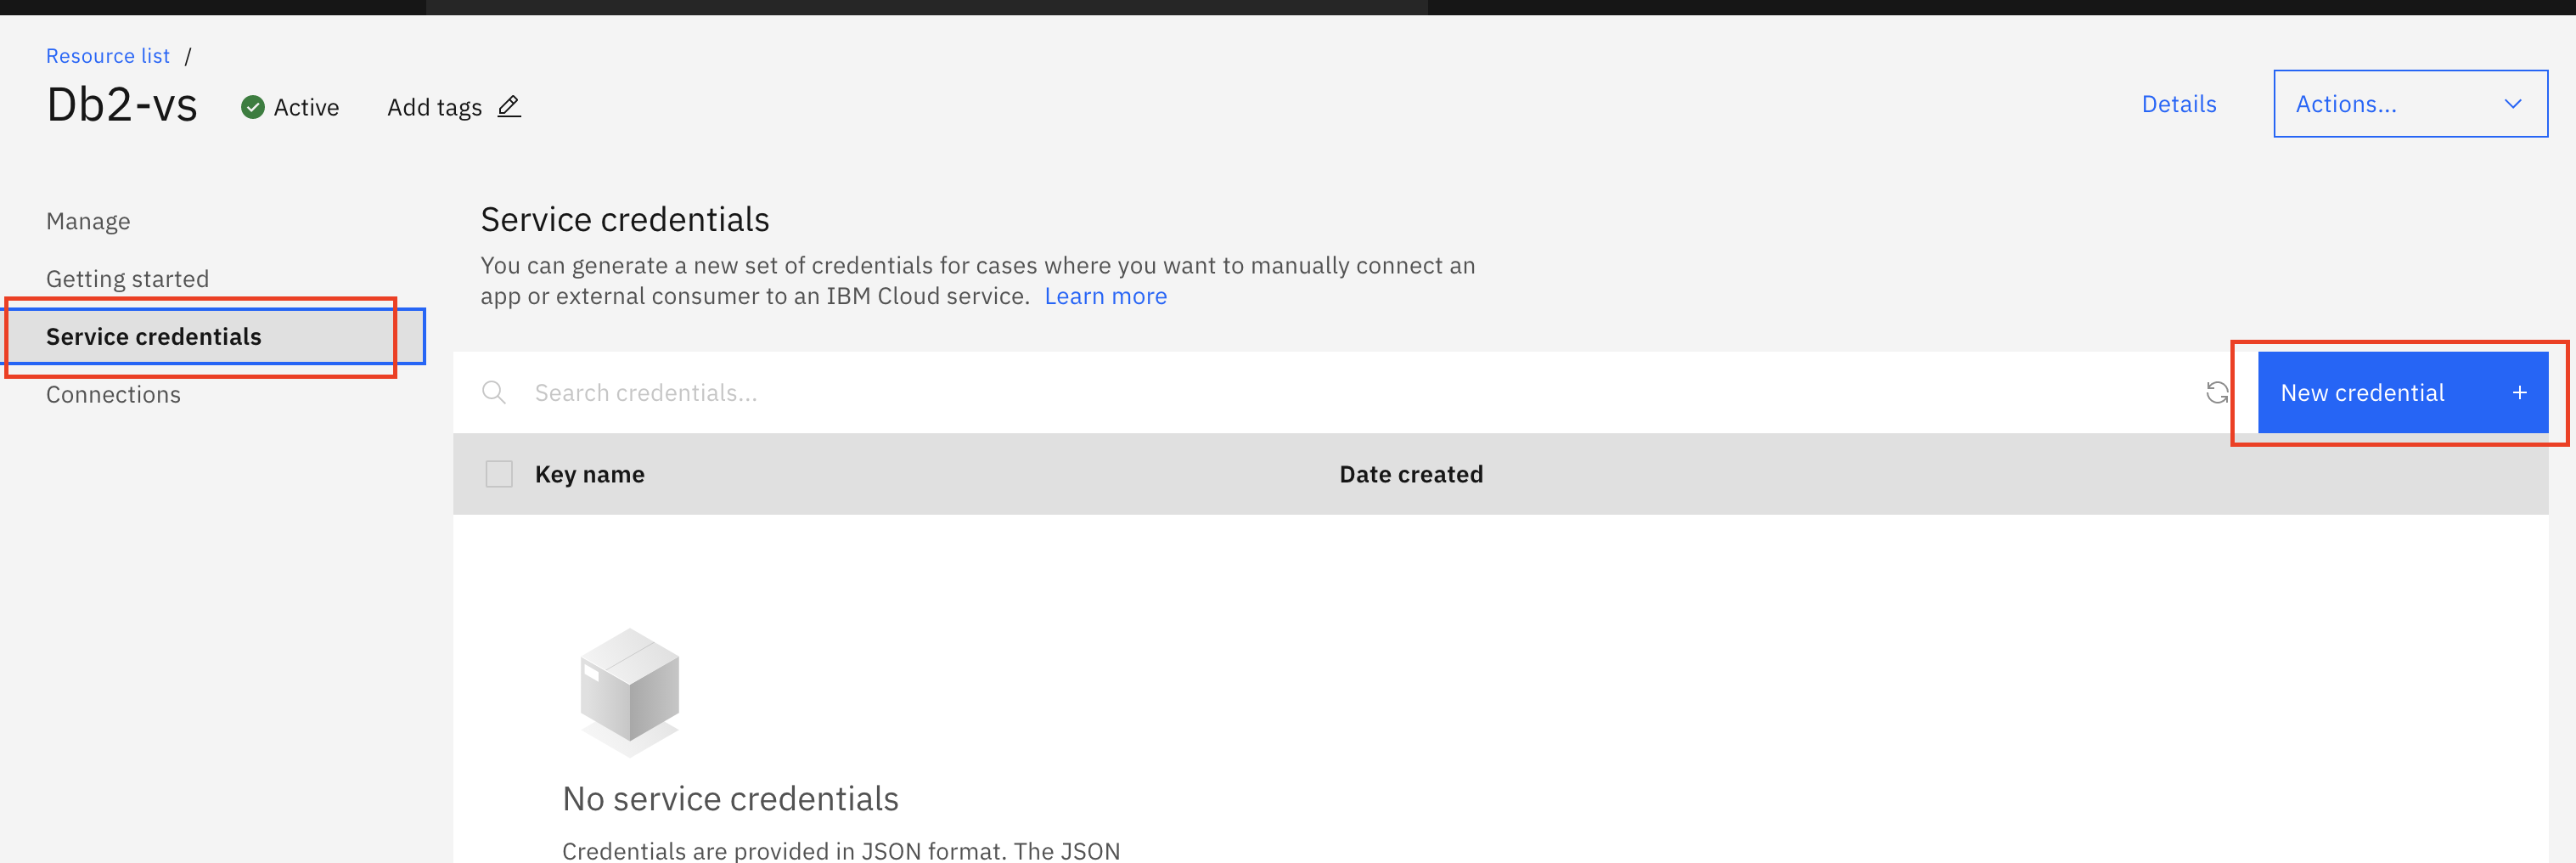

### 5. Navigate to 'Manage' on the left hand menu and click on 'Go to UI'. This will take you to the Db2 UI. 

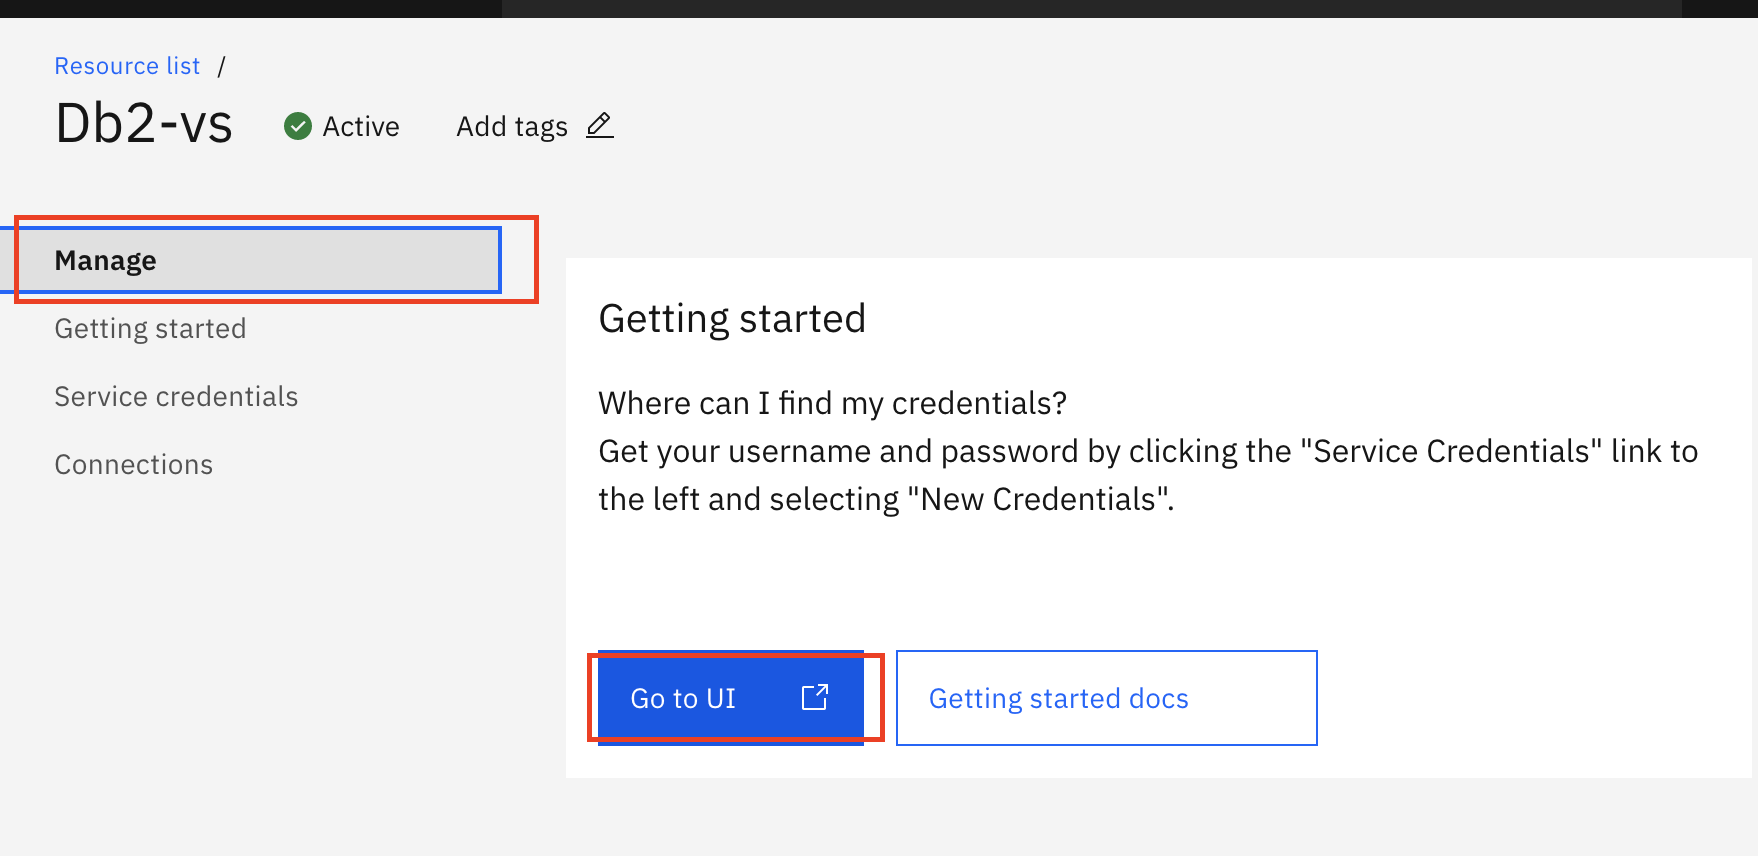

### 6. Click on the diagram flow on the left hand side. This will take you to a similar data load screen to what was done on Cloud Pak for Data

### 7. Load the Flight Destination dataset, and you will move on to the 'Target' screen.
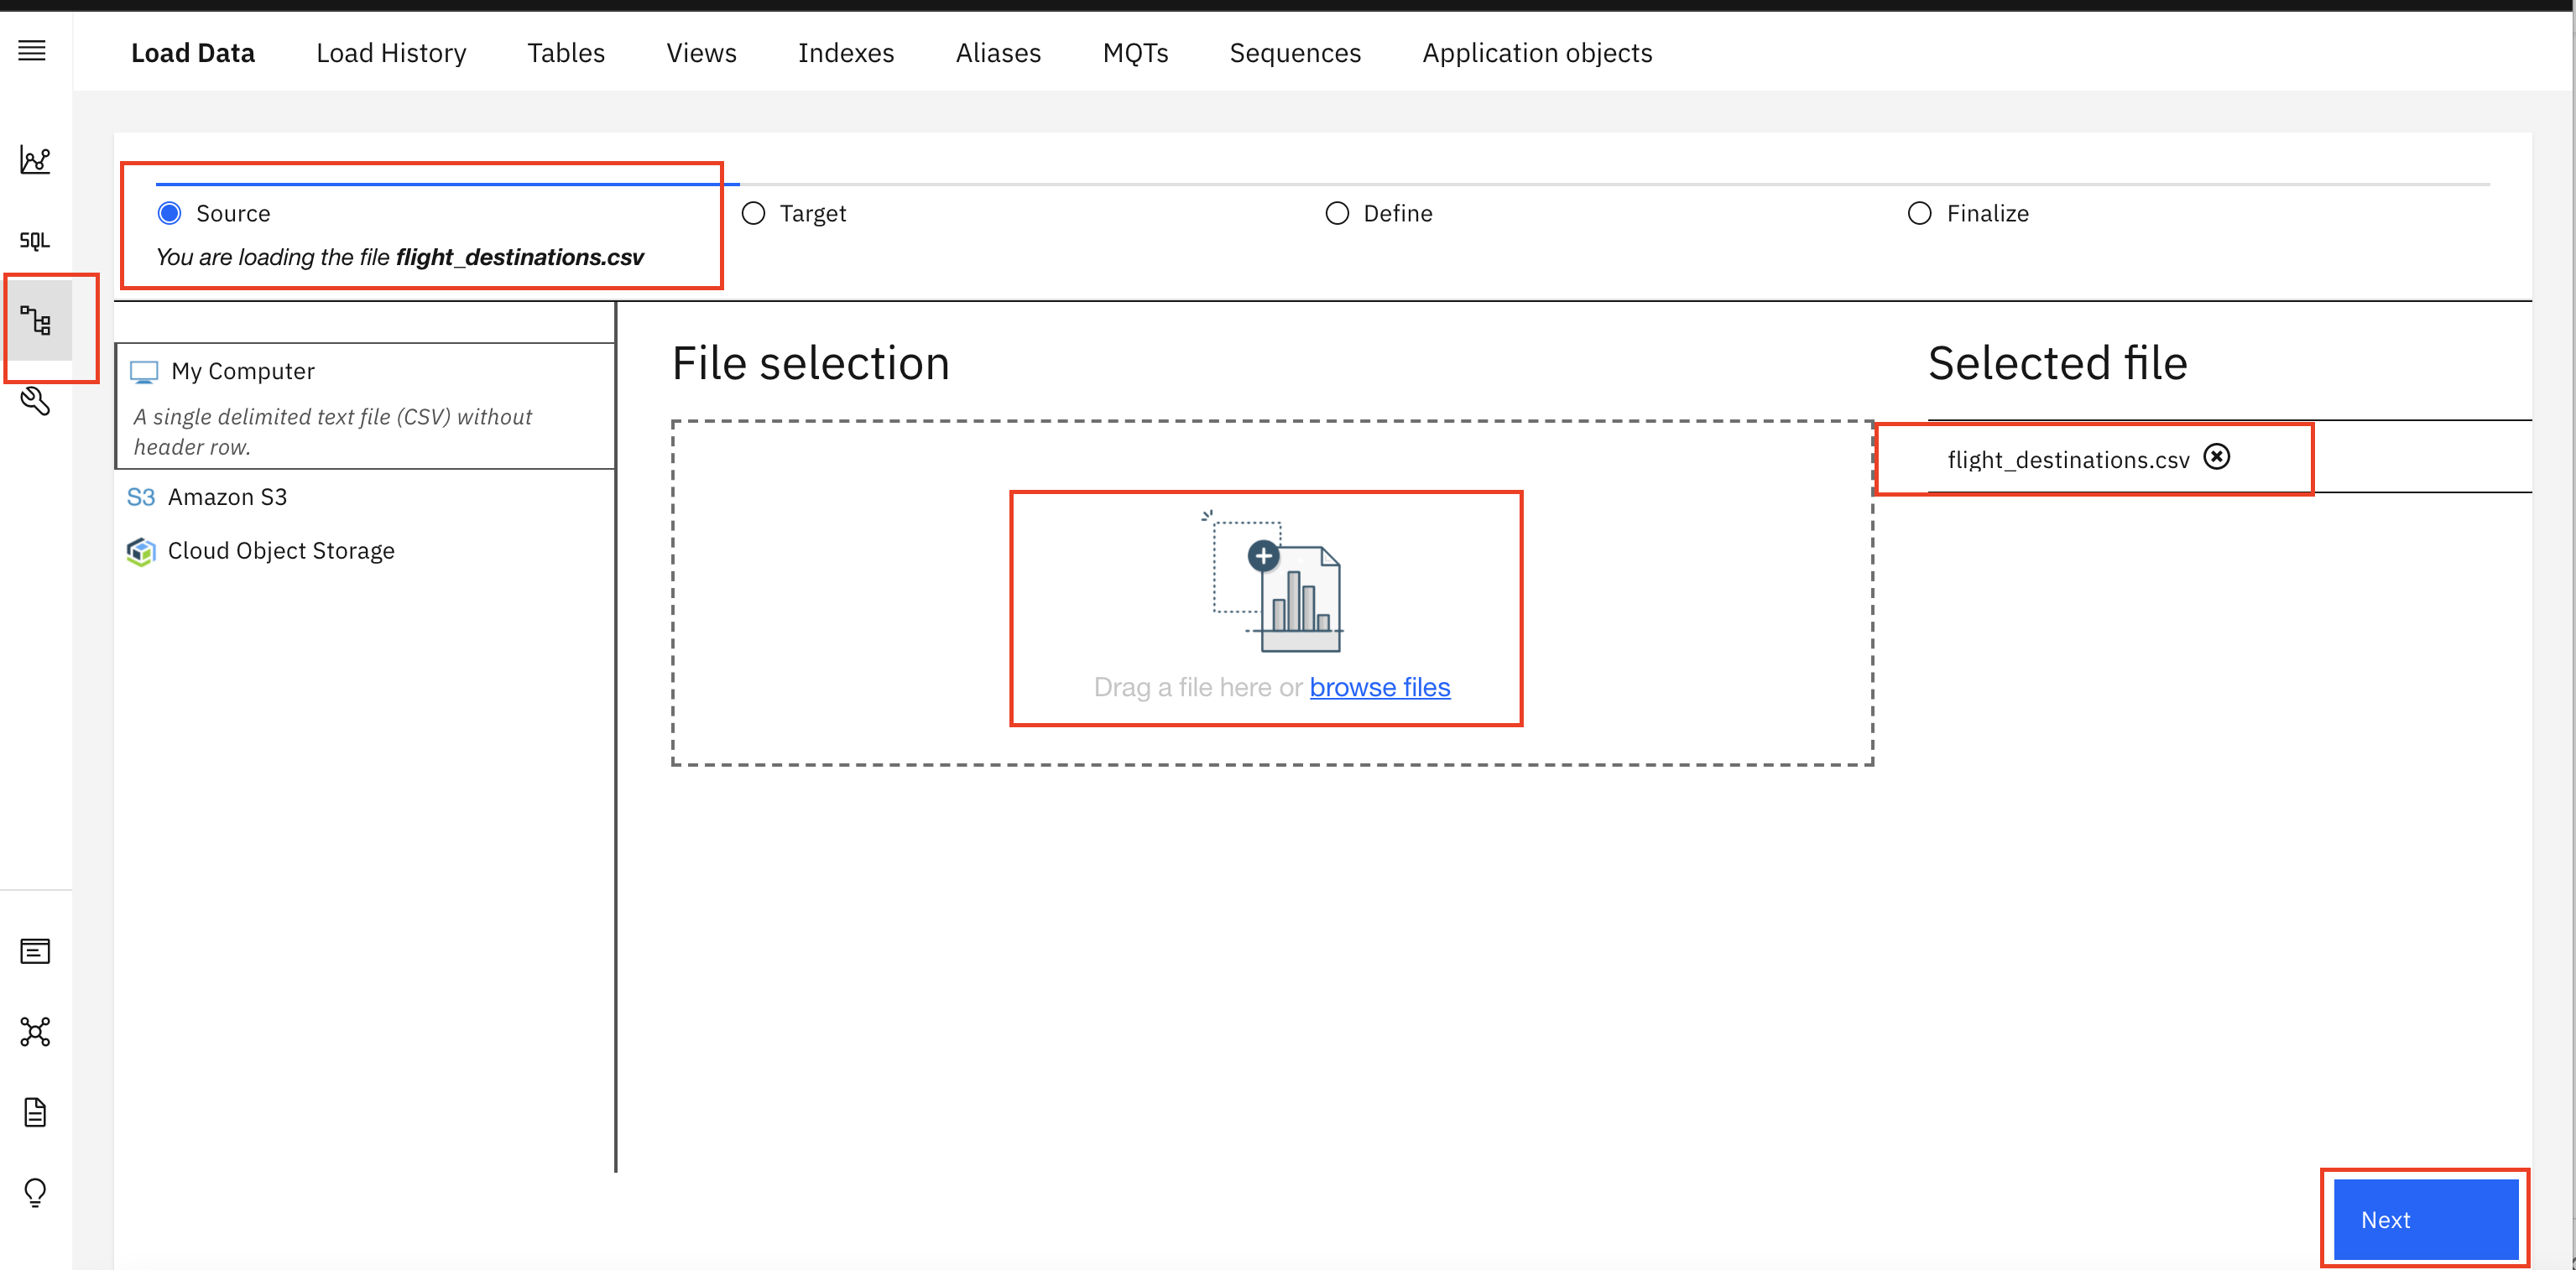

### 8. You will not be able to create a schema on the free version of Db2 on IBM Cloud. Click on the default schema. 

### 9. Click on 'New Table +' , name the table 'FLIGHT_DESTINATIONS', and click 'Create'

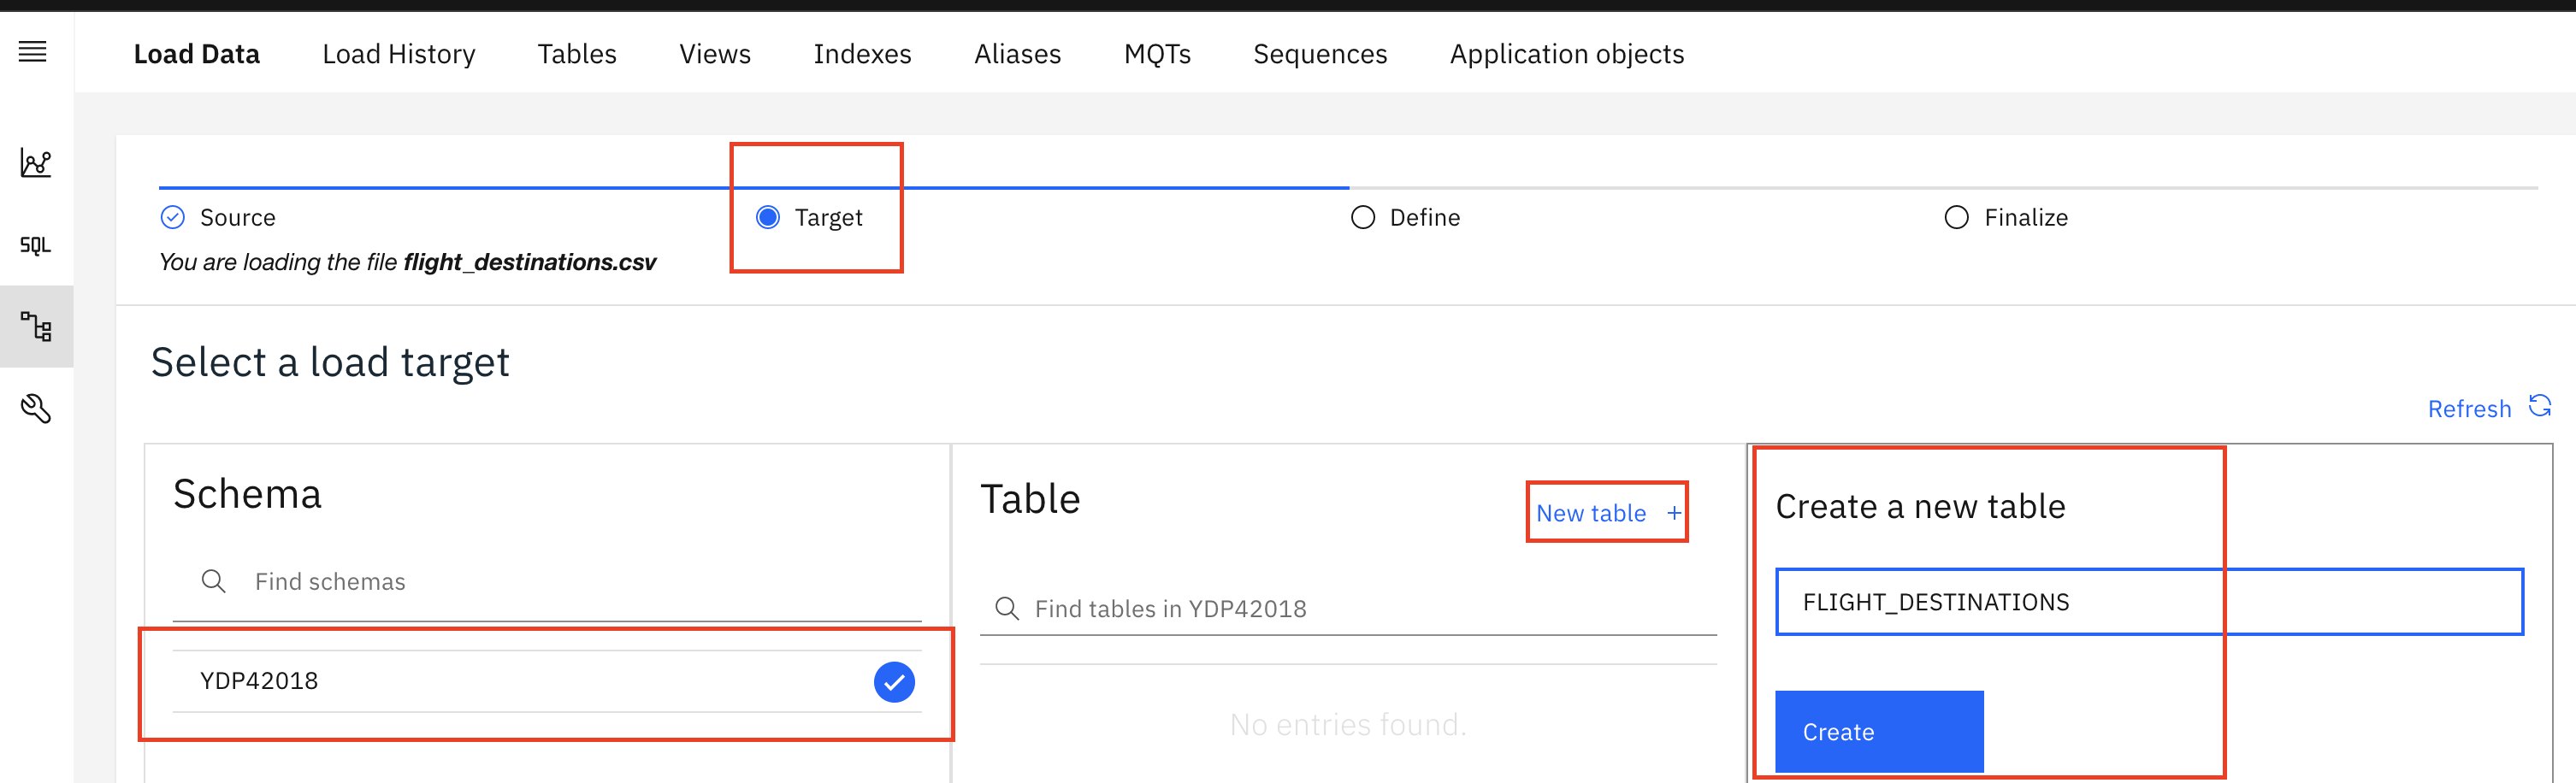

### 10. Click on 'Next' and you will be taken to the 'Define' screen. Click 'Next' again and you will go to the 'Finalize' screen.
    FYI: The column headers and data types were read correctly so the additional data type defining steps done on CP4D were not needed. 
    
   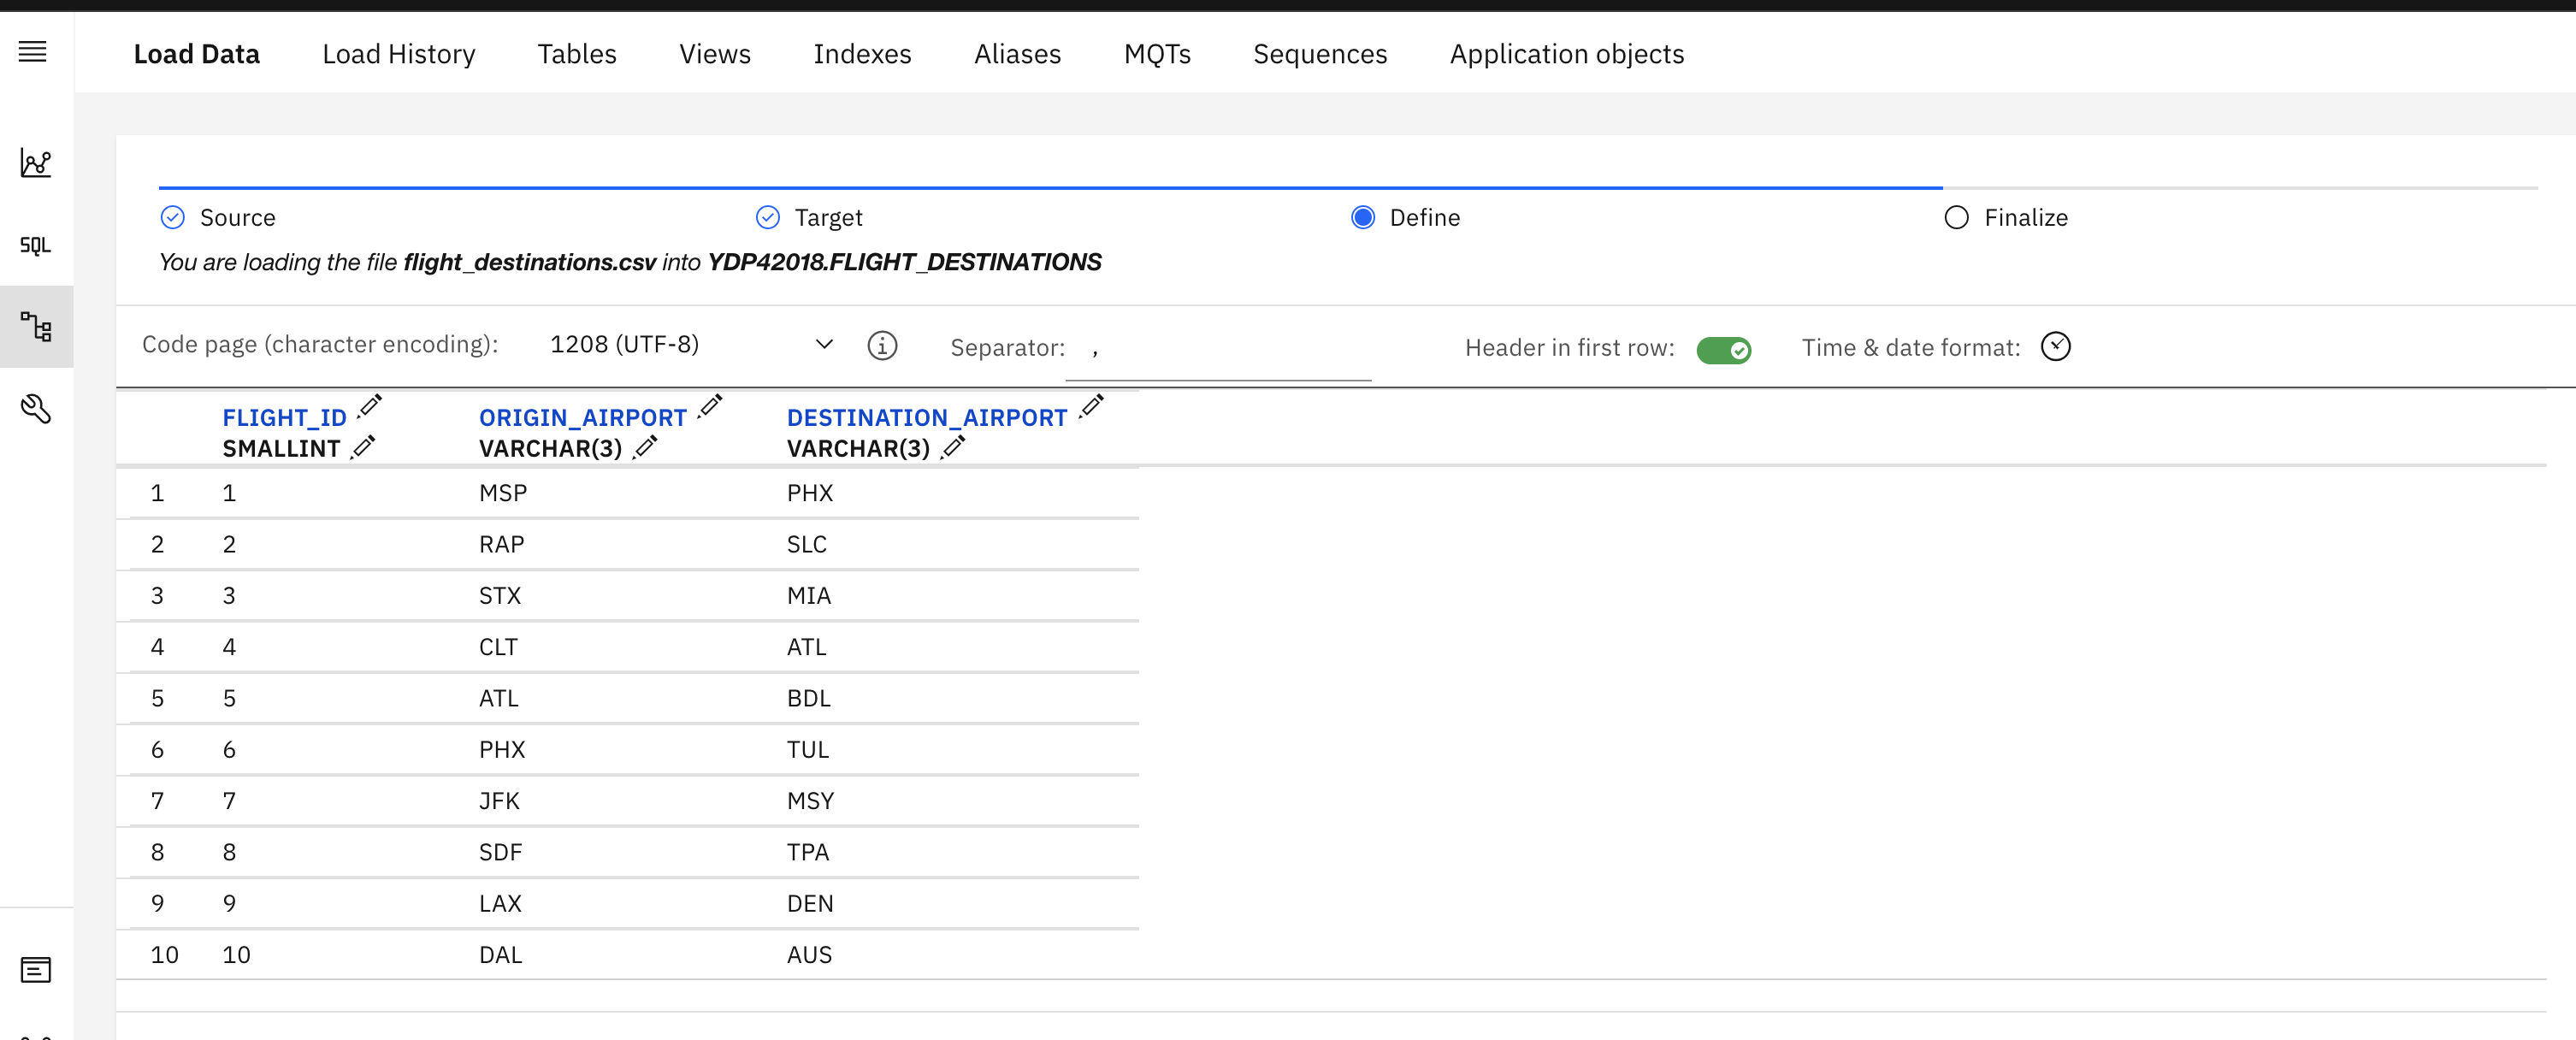
### 11. Finally click 'Begin Load'. You will have completed this step once you get the 'The data load job succeeded.' message. 

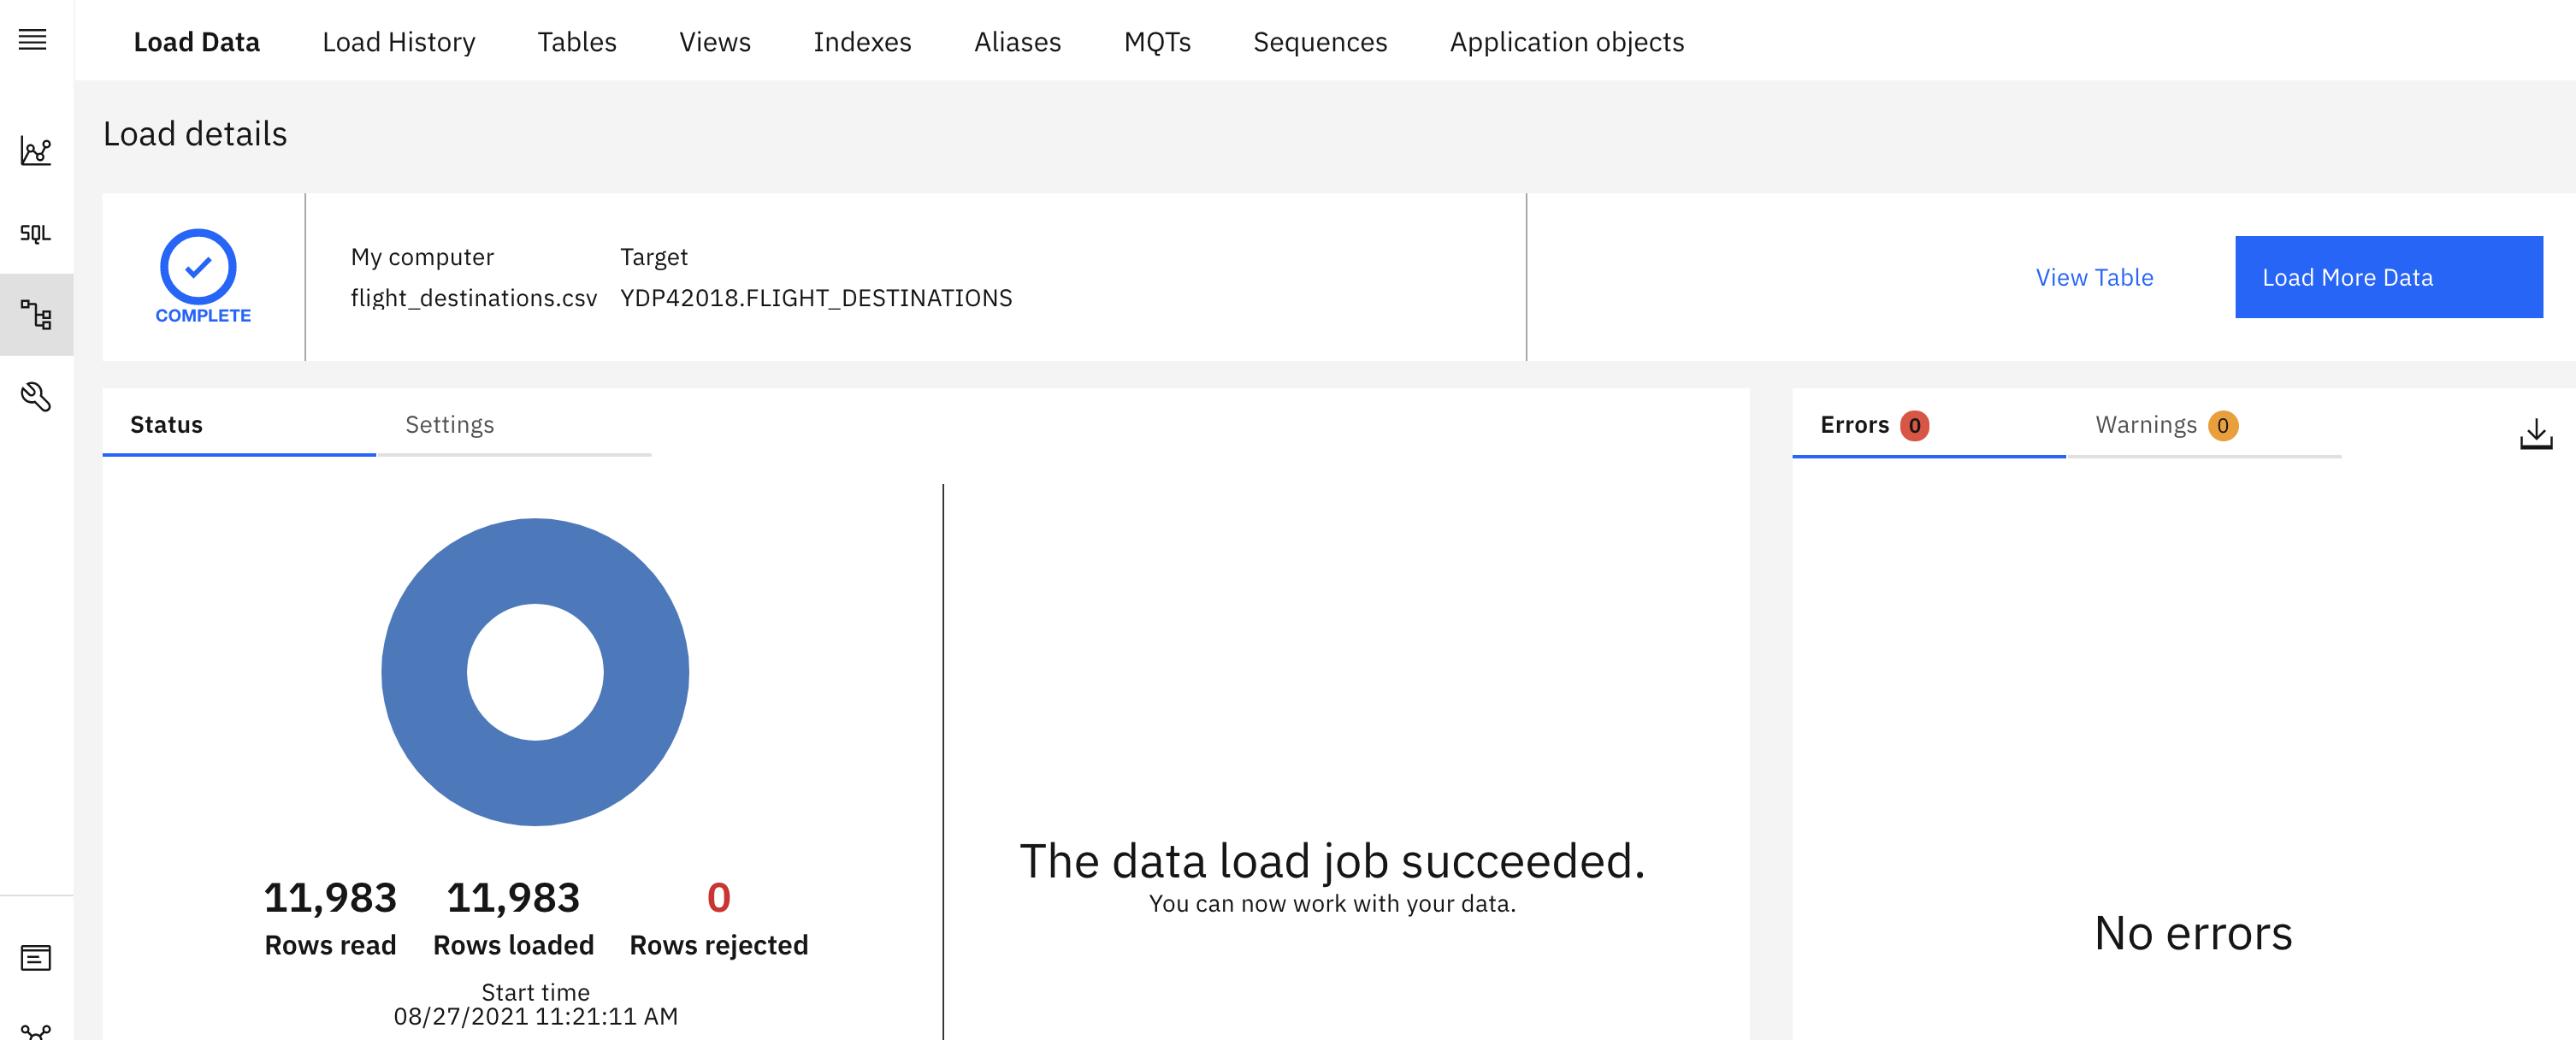

##  Add a Connection for Db2 on IBM Cloud

### 1. Go back to IBM cloud, type in 'Db2' in the navigation bar and find your Db2 instance

### 2. Navigate to 'Service Credentials' on the left hand menu and click the dropdown of the service credentials you created in the prior step. You want to record: 

    1. Username (-u): <username>
    2. Password (-p): <password>
    3. Hostname (--host): <hostname>
    4. Port (--host): <port>
    
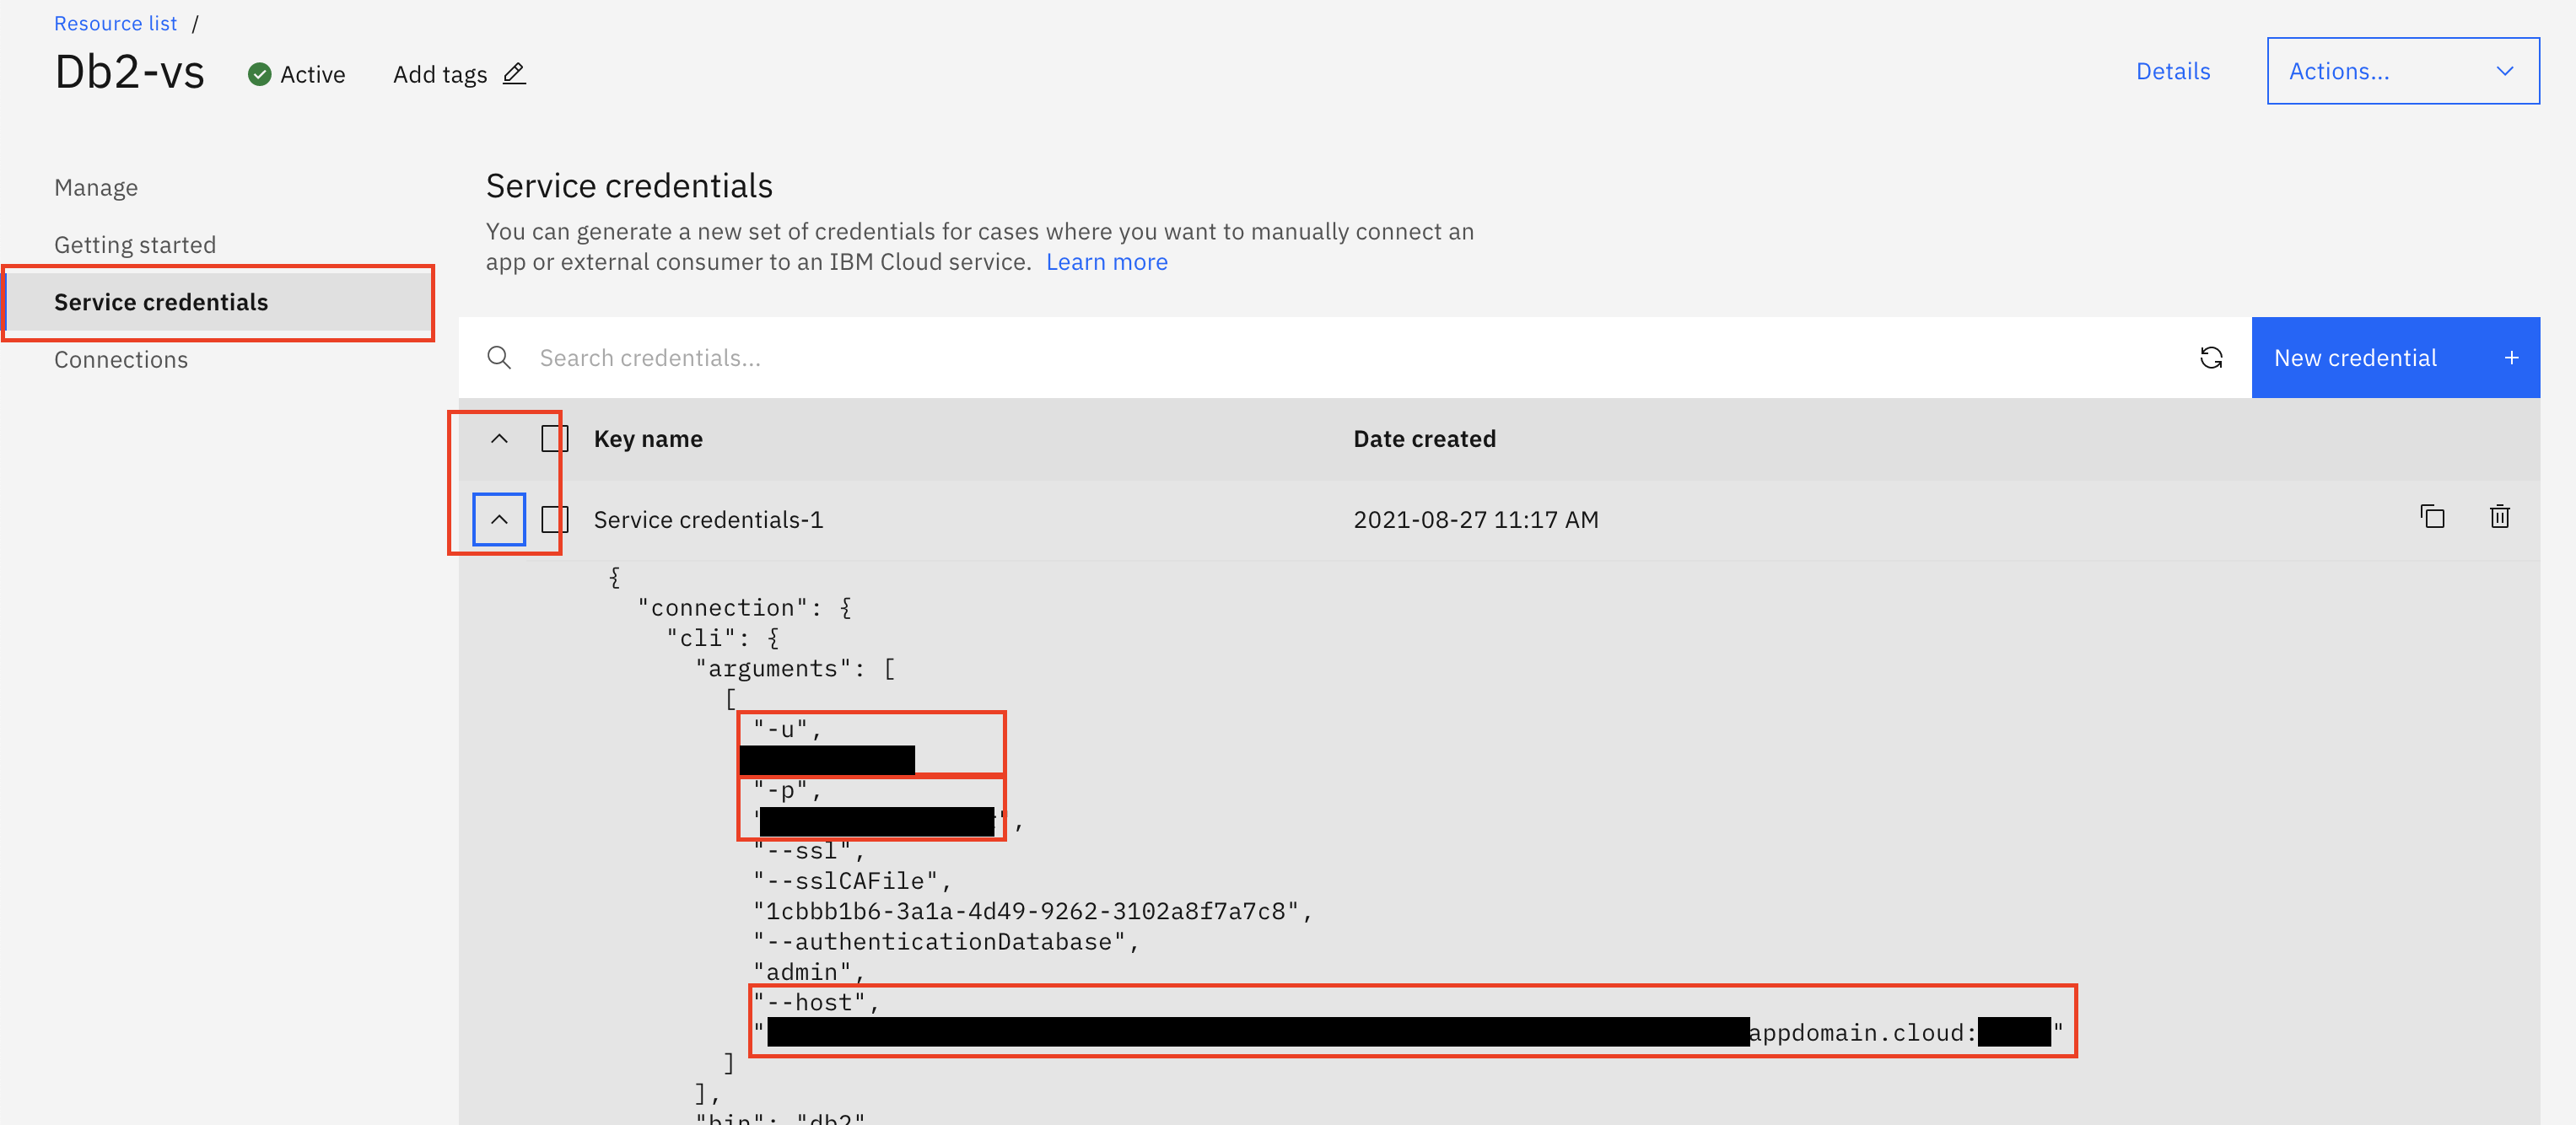

### 3. Navigate to 'Manage' on the left hand menu and cluick on 'Go to UI'. This will take you to the Db2 UI. 

### 4. From the Db2 UI, click on the wrench icon. This will take you to the connections page. 

### 5. Under the Linux tab, click on 'Download SSL Certificate'.  The downloaded file should be named 'DigiCertGlobalRootCA.crt'

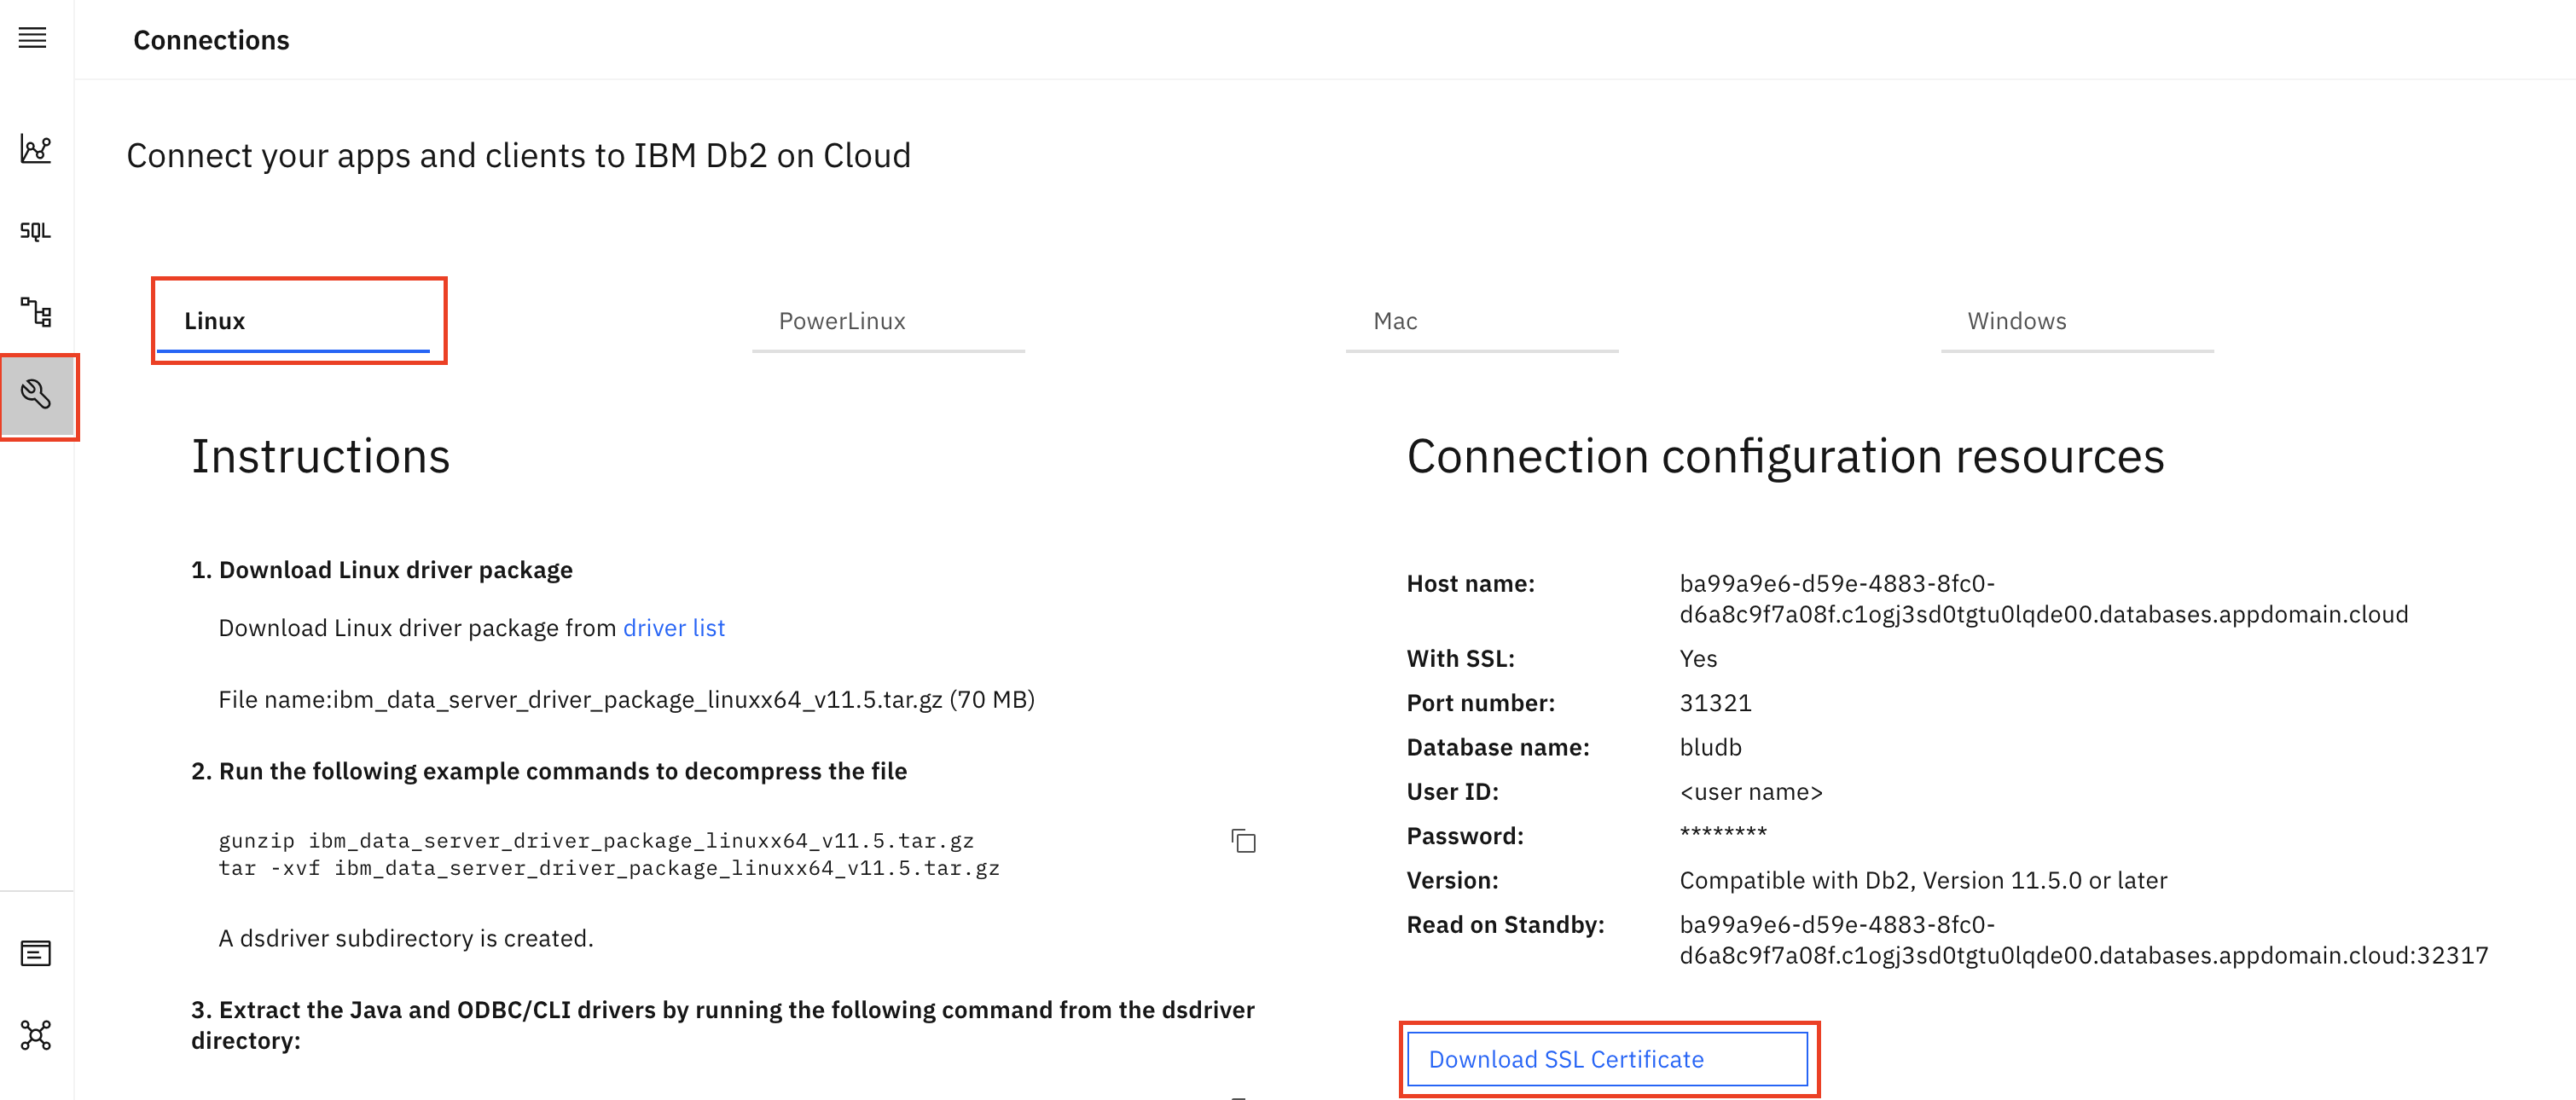
### 6. Convert the downloaded DigiCertGlobalRootCA.crt certificate to .pem format. 
    6a. Open a terminal window. 
    6b. Run: openssl x509 -inform DER -in /path/to/certificate/DigiCertGlobalRootCA.crt -out cp4d.pem'
        - in my case, my download certificate was in the ~/Downloads/DigiCertGlobalRootCA.crt
    6c. Run: cat cp4d.pem and you will get the base64 enconded certificate
    6d. **Very Important** make sure you copy and save the certificate. It will be used to create a connection. 
    
   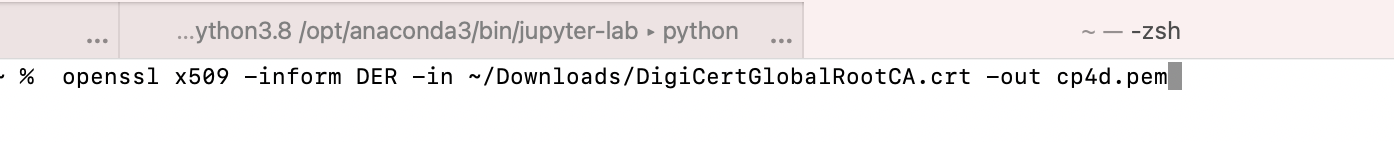
   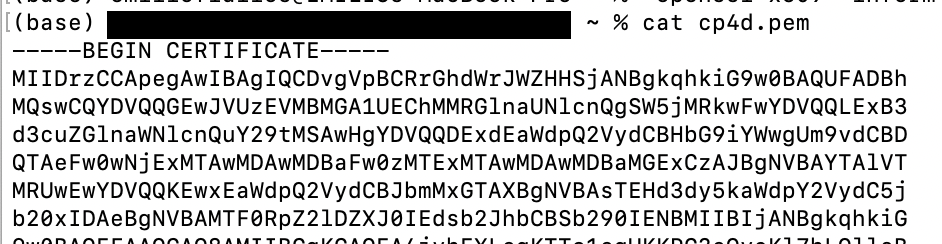
### 7. Go back to Cloud Pak for Data

### 8. Click on the Sandwhich icon at the top left and naviagte 'Platform Connections'. This will take you to the create connections UI. 

### 9. Click on 'New Connection +'. This will take you to the databases page and select 'Db2'. 

### 10. In the 'New Db2 connection' field prompts, fill in the following information: 

    1. Name: FlightInfoIBMCloud
    2. Database: BLUDB
    3. Hostname: collected in step 2
    4. Port: collected in step 2
    5. User: collected in step 2
    6. Password: collected in step 2
    7. SSL Certificate (optional): Copy and paste the SSL certificate from step 6
    
    10a. Make sure 'Port is SSL-enabled (optional)' is checked ON

   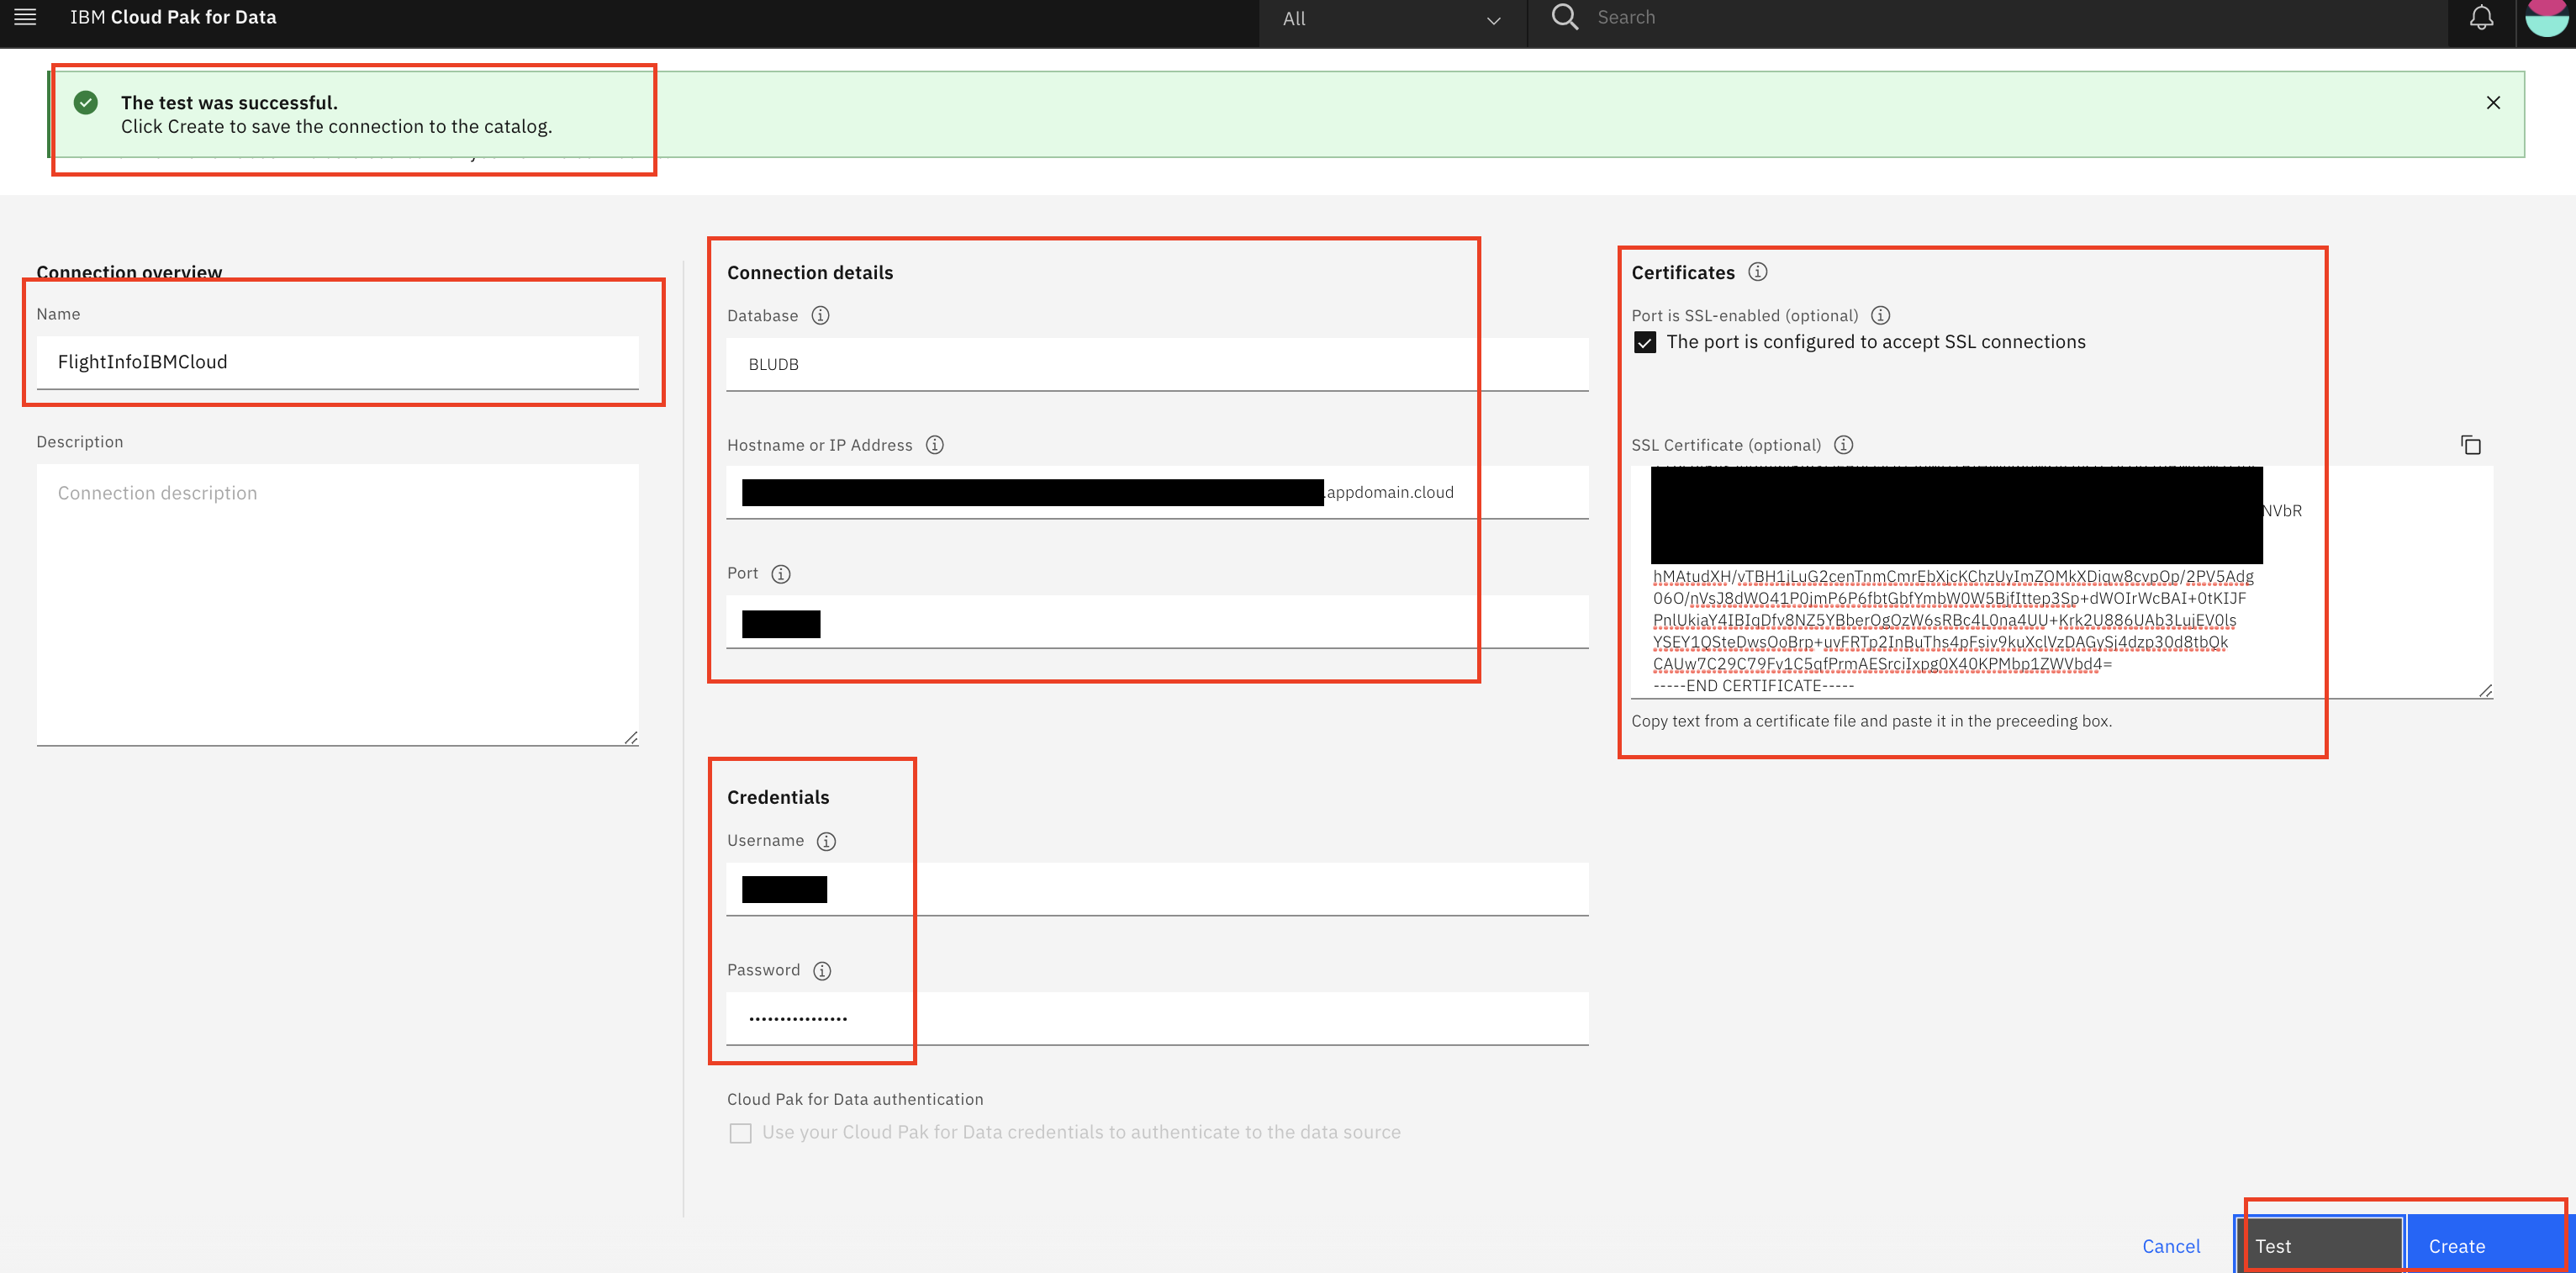
   
### 11. Click 'Test' to test the connection and then click 'Create'. You will have completed this step once you see the connection in the 'Platform Connections' page.
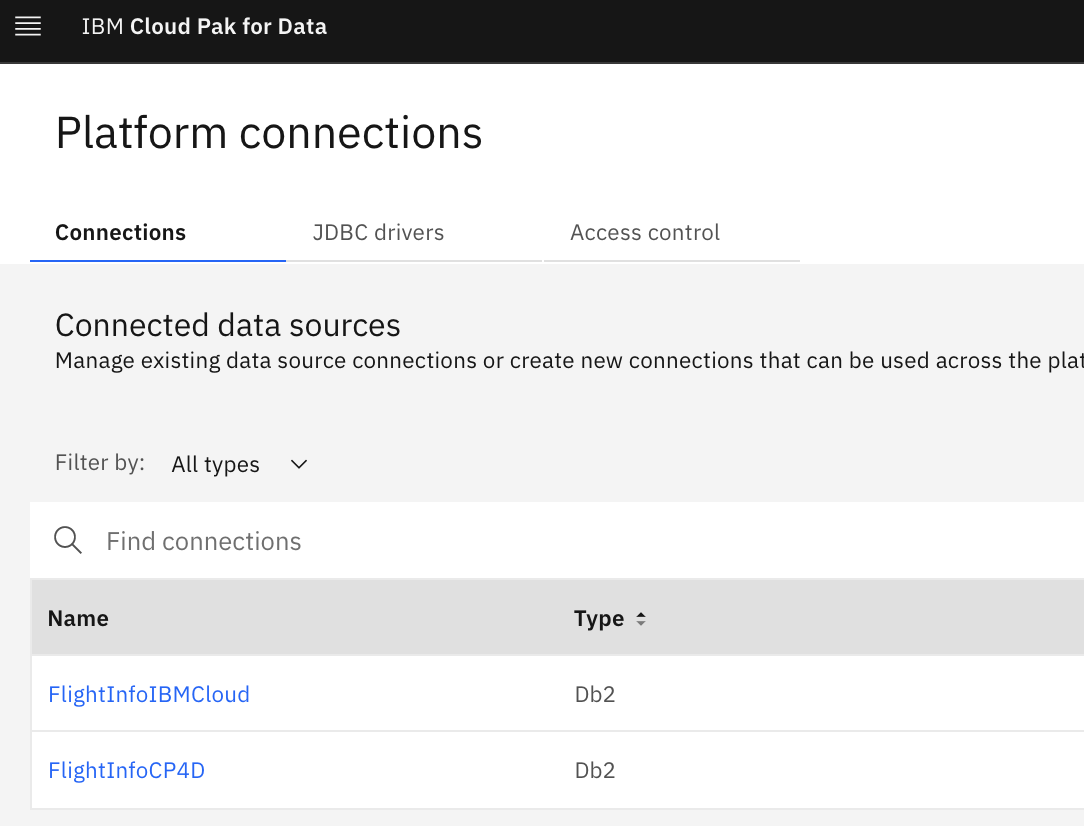